<a href="https://colab.research.google.com/github/allenphos/Term-Deposit-Subscription-Forecasting/blob/main/Term_Deposit_Subscription_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting Term Deposit Subscriptions

In this study, a machine learning model has been developed to predict the probability of bank customers subscribing to term deposits. Such forecasting is a relevant task for financial institutions, as it allows for the optimization of marketing strategies and enhances customer engagement effectiveness.

To build the model, a dataset containing information about previous marketing campaigns of the bank was used. The data includes demographic characteristics of customers, their interaction history with the bank, as well as socio-economic indicators. Various machine learning methods were applied, such as logistic regression, K-nearest neighbors, decision trees, and boosting algorithms.

The dataset used originates from the UCI Machine Learning Repository, and the same dataset can be downloaded from Google Drive [here](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link).


#### **Bank Customer Data**:
1. **age** – age of the customer (numerical variable).  
2. **job** – type of employment (categorical variable: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – marital status (categorical variable: `divorced`, `married`, `single`, `unknown`; note: `divorced` means divorced or widowed).  
4. **education** – level of education (categorical variable: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – does the customer have a credit default? (categorical variable: `no`, `yes`, `unknown`).  
6. **housing** – does the customer have a housing loan? (categorical variable: `no`, `yes`, `unknown`).  
7. **loan** – does the customer have a personal loan? (categorical variable: `no`, `yes`, `unknown`).  

#### **Data on the Last Contact within the Current Marketing Campaign**:
8. **contact** – type of communication during the last contact (categorical variable: `cellular`, `telephone`).  
9. **month** – month of the last contact (categorical variable: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – day of the week of the last contact (categorical variable: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – duration of the last contact in seconds (numerical variable).  
   ⚠ **Important Note**: this variable has a significant impact on the target variable (for example, if duration = 0, then y = `no`). However, the value of duration is unknown until the call is made. Furthermore, after the call is completed, the value of y is already known. Therefore, this variable should only be used for model comparison, but not included in the final predictive model.  

#### **Other Attributes**:
12. **campaign** – number of contacts within the current campaign for this customer (numerical variable, includes the last contact).  
13. **pdays** – number of days since the last contact with the customer in the previous campaign (numerical variable; a value of 999 means that the customer has not been contacted before).  
14. **previous** – number of contacts made before this campaign for this customer (numerical variable).  
15. **poutcome** – outcome of the previous marketing campaign (categorical variable: `failure`, `nonexistent`, `success`).  

#### **Socio-Economic Context Attributes**:
16. **emp.var.rate** – employment variation rate (quarterly indicator, numerical variable).  
17. **cons.price.idx** – consumer price index (monthly indicator, numerical variable).  
18. **cons.conf.idx** – consumer confidence index (monthly indicator, numerical variable).  
19. **euribor3m** – 3-month Euribor rate (daily indicator, numerical variable).  
20. **nr.employed** – number of employed persons (quarterly indicator, numerical variable).  

#### **Target Variable**:
21. **y** – did the customer subscribe to a time deposit? (binary variable: `yes`, `no`).

A thorough data analysis was conducted to identify the factors influencing the customer's decision to subscribe to a time deposit. The model's hyperparameters were optimized to achieve maximum prediction accuracy.

The developed model can be used by the bank to predict the probability of potential customers subscribing to time deposits. Such forecasting will allow the bank to personalize marketing offers and increase the likelihood of successfully attracting customers.

# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

pd.set_option('float_format', '{:.2f}'.format)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/bank-additional-full.csv", delimiter=";")

# 1. Exploratory Data Analysis

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [5]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


## Categorical values

In [7]:
df.select_dtypes(include=['object']).nunique()

,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


In [8]:
len(df.select_dtypes(include = "object").columns)

11

In [9]:
len(df.select_dtypes(include="number").columns)

10

In [10]:
df.isnull().values.sum()

np.int64(0)

In [11]:
df['y'].value_counts(normalize = True) * 100

,proportion
y,
no,88.73
yes,11.27


Univariate (categorical vs. target) and bivariate (categorical vs. categorical) analysis (histogram) - categorical columns

In [12]:
def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Normalized distribution of values by category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # Annotation of values in the bar plot
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Number of data points by category: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='y' )


def bi_countplot_target(df1, column, hue_column):
  bi_cat_countplot(df1, column, hue_column)
  plt.show()


In [13]:
def one_cat_countplot(df, column, hue_column):
    fig, ax = plt.subplots(figsize=(18, 12))

    pltname = 'Normalized distribution of values'

    # Get unique values for hue_column
    unique_hue_values = df[hue_column].unique()

    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=ax, title=pltname)

    # Annotation of values in the bar plot
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

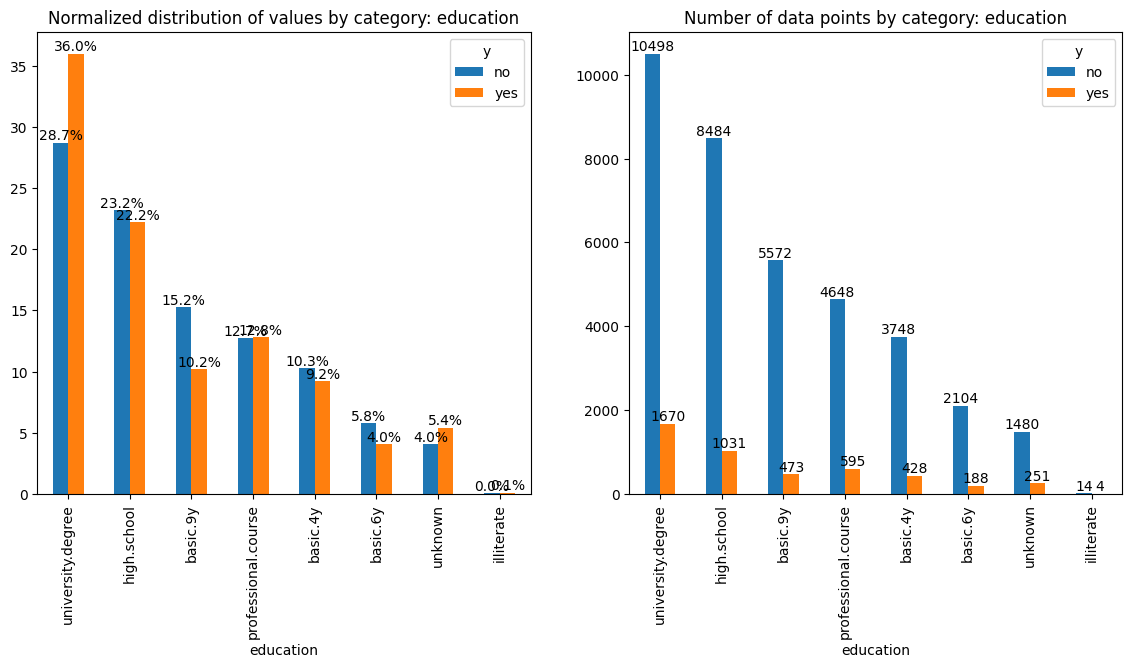

In [14]:
uni_cat_target_compare(df, 'education')

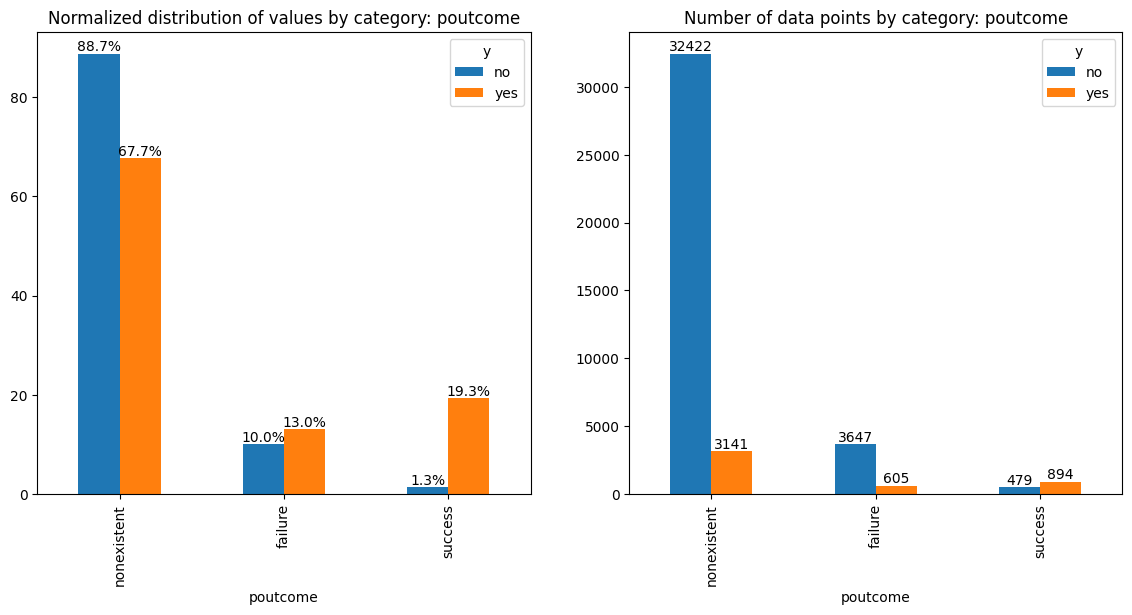

In [15]:
uni_cat_target_compare(df, 'poutcome')

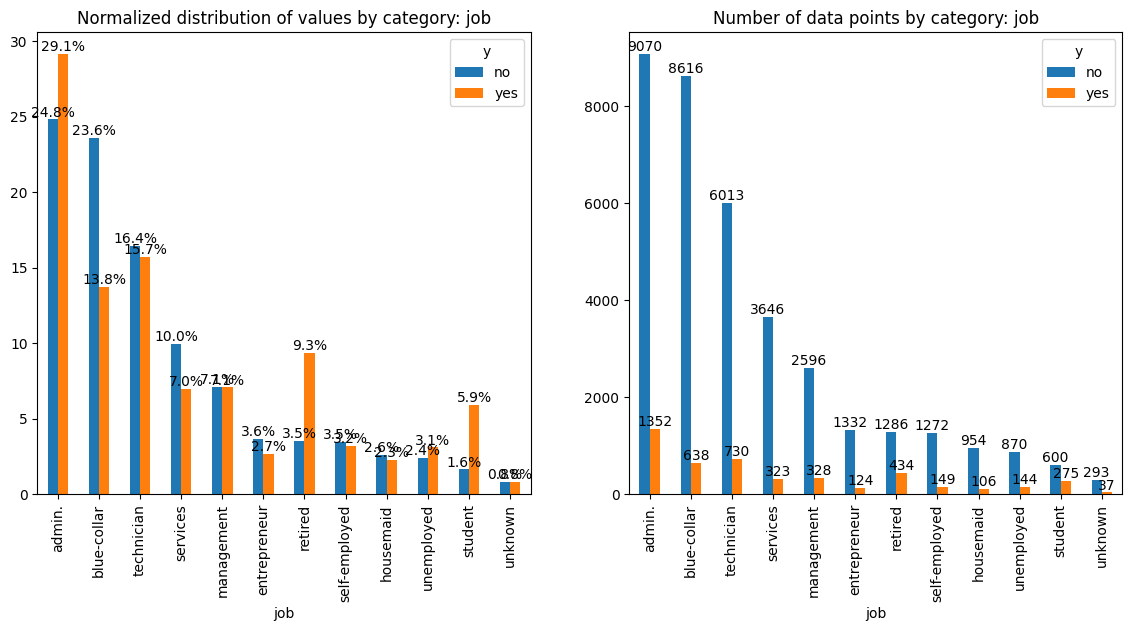

In [16]:
uni_cat_target_compare(df, 'job')

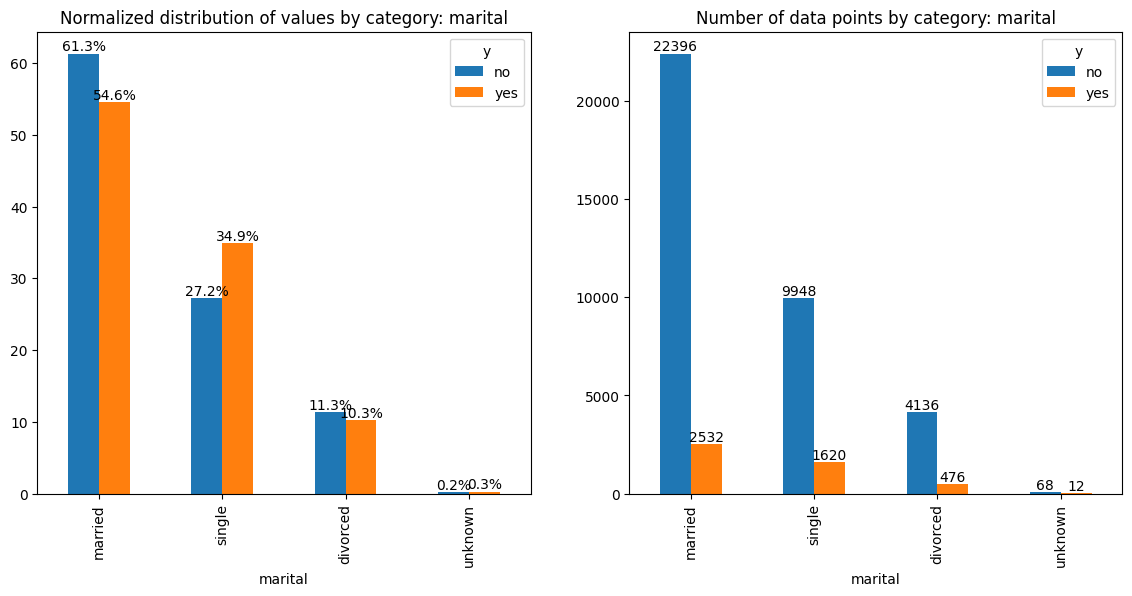

In [17]:
uni_cat_target_compare(df, 'marital')

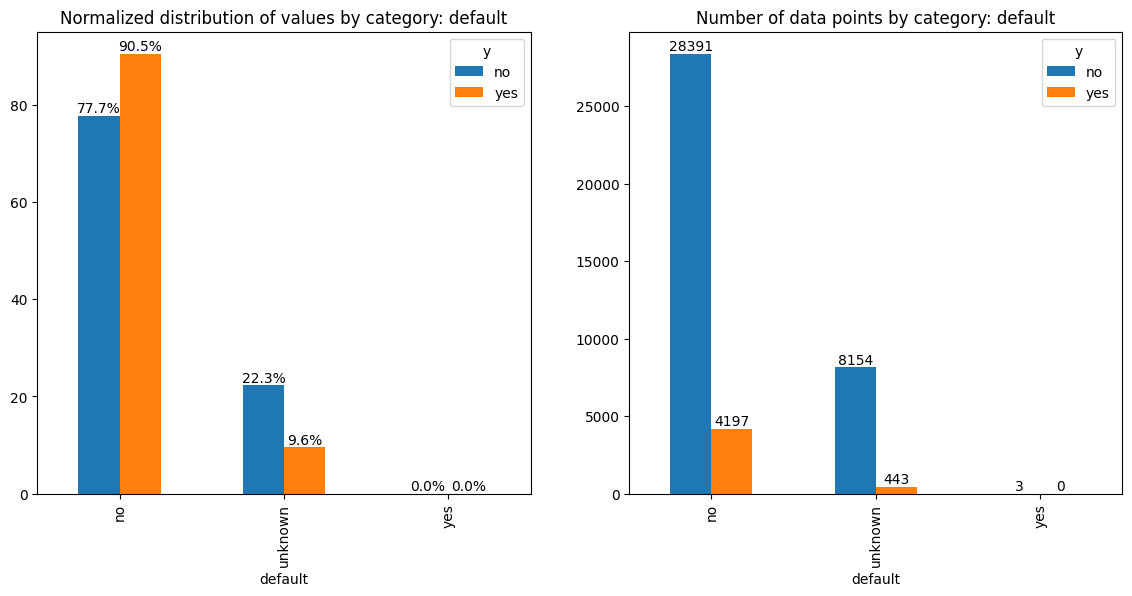

In [18]:
uni_cat_target_compare(df, 'default')

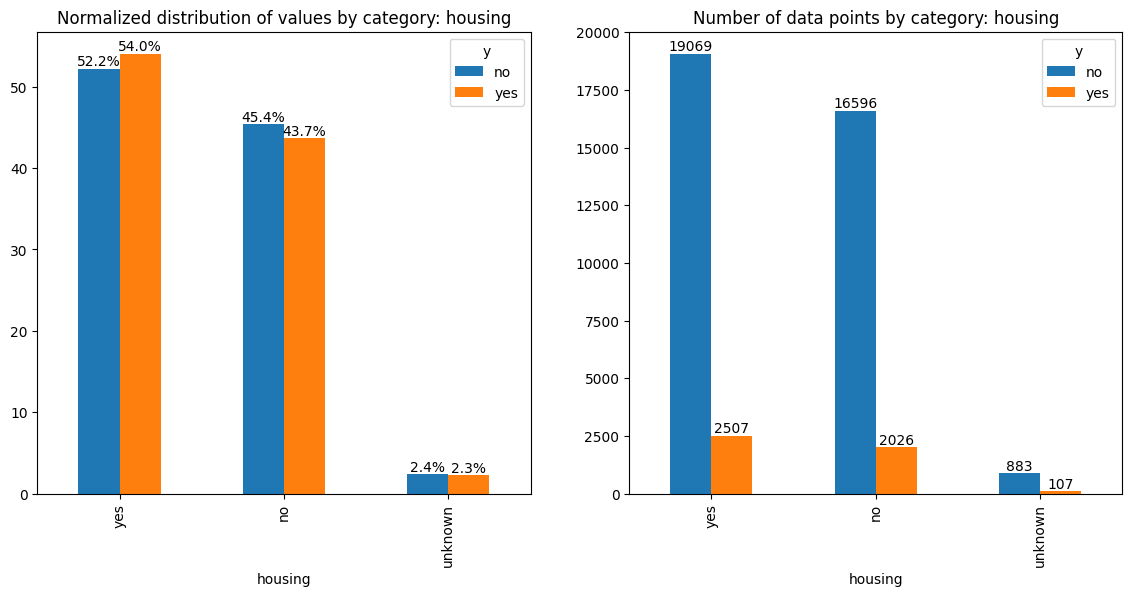

In [19]:
uni_cat_target_compare(df, 'housing')

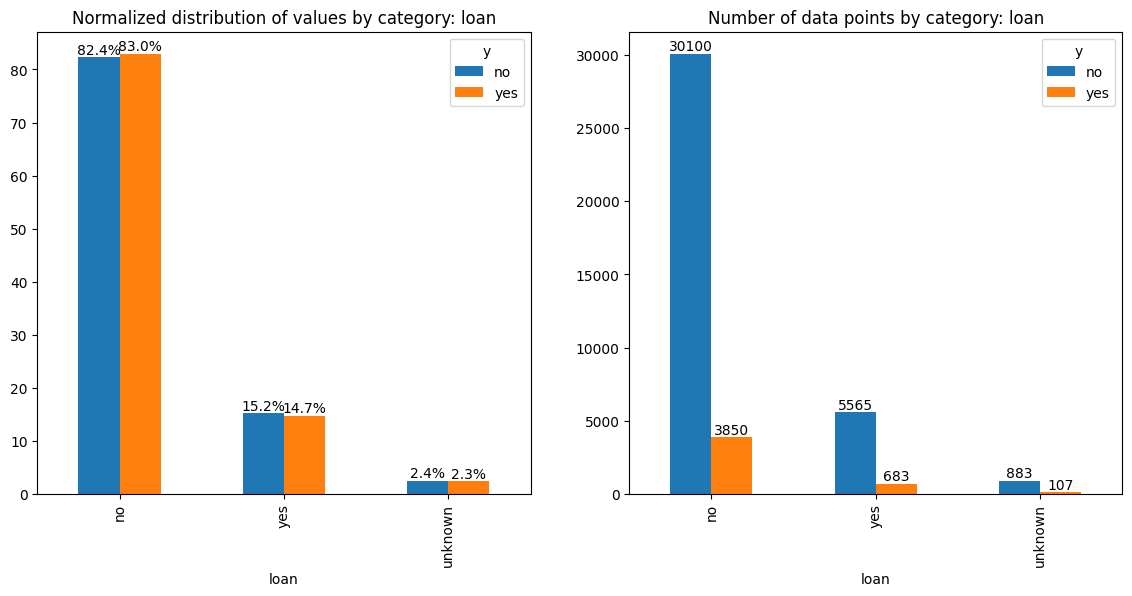

In [20]:
uni_cat_target_compare(df, 'loan')

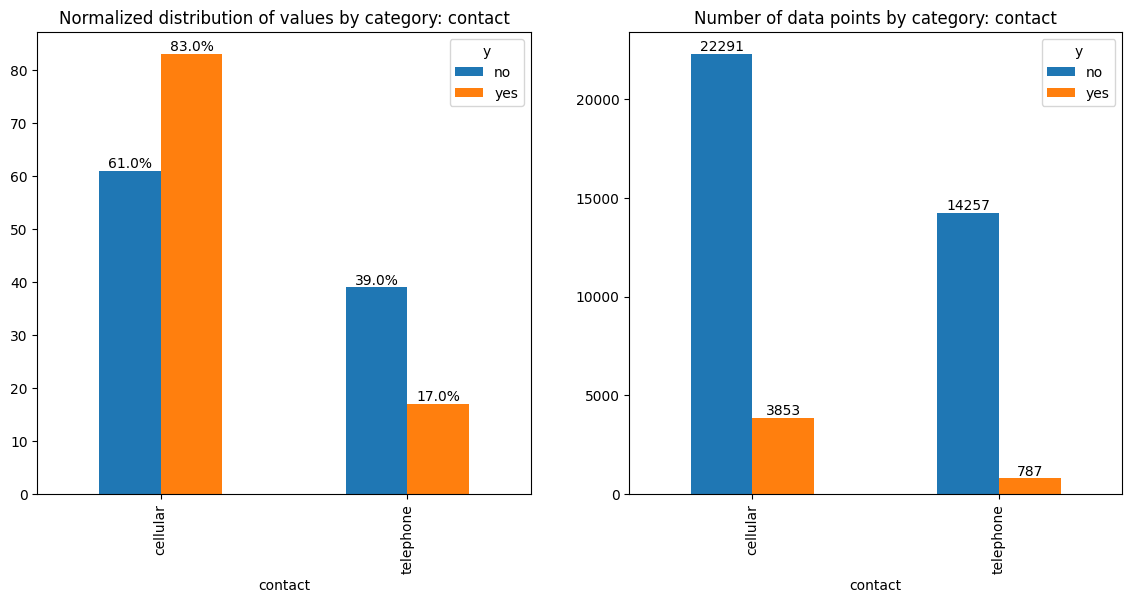

In [21]:
uni_cat_target_compare(df, 'contact')

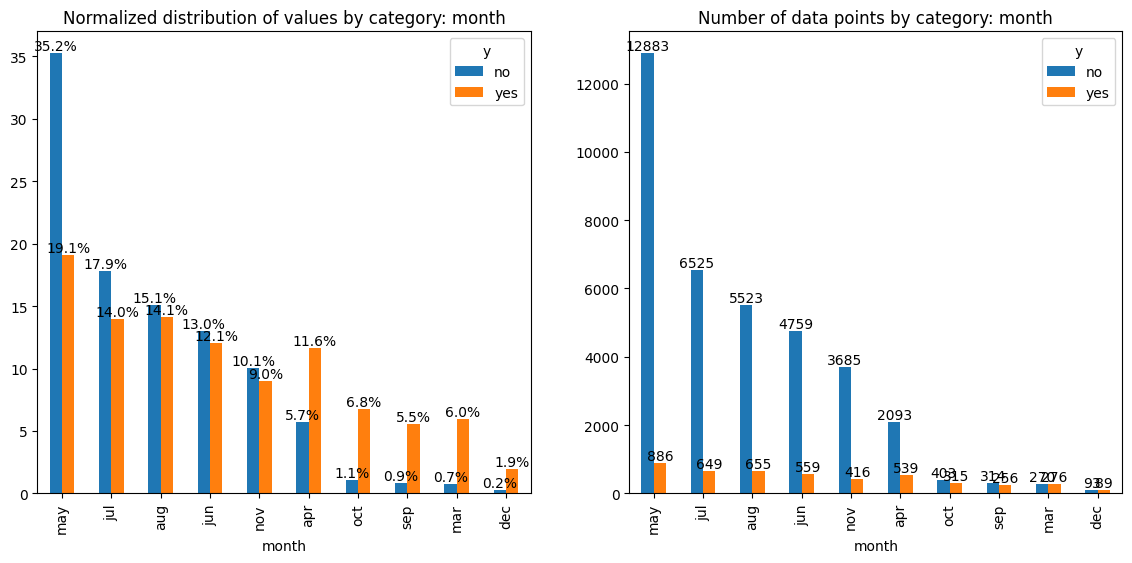

In [22]:
uni_cat_target_compare(df, 'month')

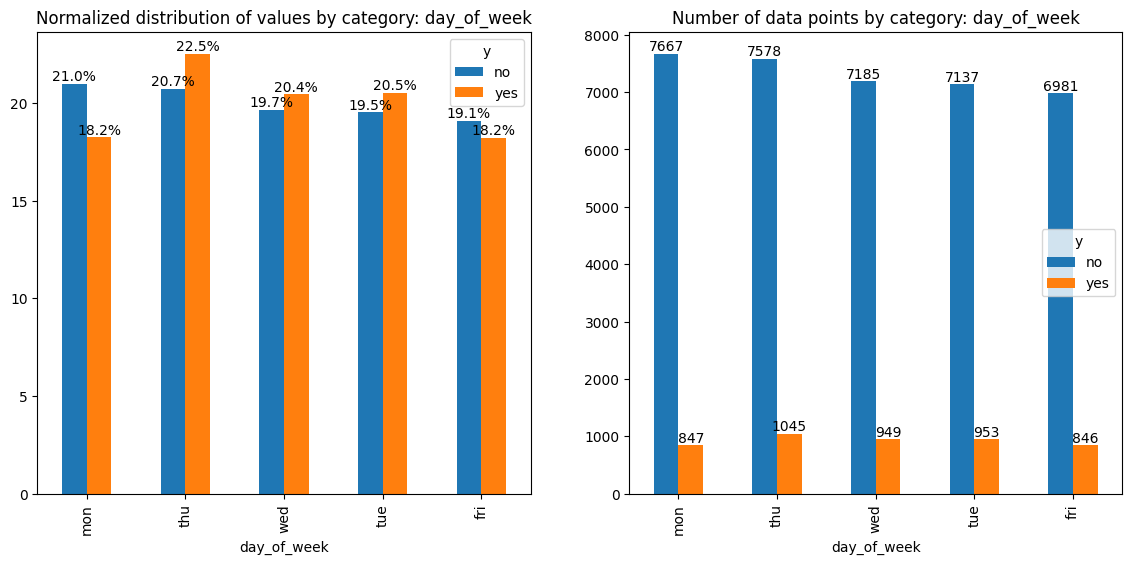

In [23]:
uni_cat_target_compare(df, 'day_of_week')

### Analysis of distribution of univariate categorical values

Did the client sign a term deposit?


- **poutcome**: for clients with **success** in previous marketing campaign the probability of signing a term deposit is higher than for clients with failure or nonexistent in previous marketing campaign.
- **education**: for client with **university**.degree the probability of signing a term deposit is higher than for clients with other education levels.
- **job**: for clients who **admin**, retired, student the probability of signing a term deposit is much higher than for clients with other jobs, and much lower for clients who do manual labor.
- **marital**: for clients who are **single** the probability of signing a term deposit is a little higher than for clients who are married or divorced.
- **default**: for clients who **don't have a credit** in default the probability of signing a term deposit is a little higher than for clients who have a credit in default.
- **housing**: for clients who **have a housing loan** the probability of signing a term deposit is a little higher than for clients who dont have a housing loan.
- **loan**: for clients who **don't have a personal loan** the probability of signing a term deposit is a almost the same as for clients who have a personal loan.
- **contact**: for clients who were contacted by **cellular** the probability of signing a term deposit is much higher than for clients who were contacted by telephone.
- **month**: May and July are the most unfavorable months for sales, the majority of rejections occur during these months.
- **day_of_week**: Monday and Friday are unfavorable days for sales, the majority of rejections occur during these days.

**Distribution of bivariate categorical values**

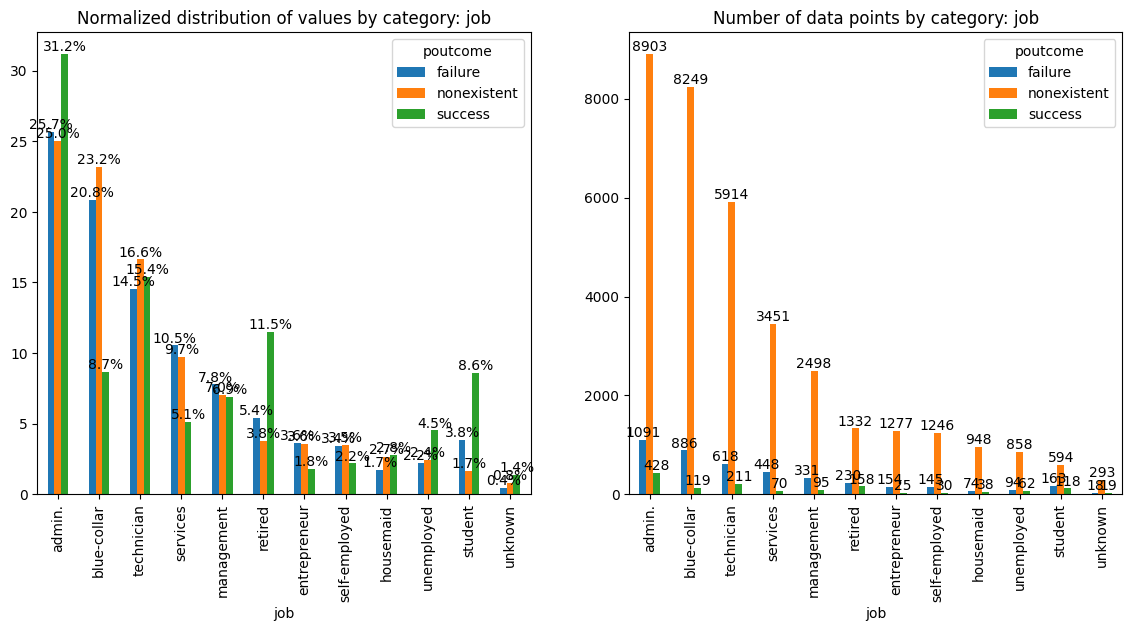

In [24]:
bi_countplot_target(df, 'job', 'poutcome')

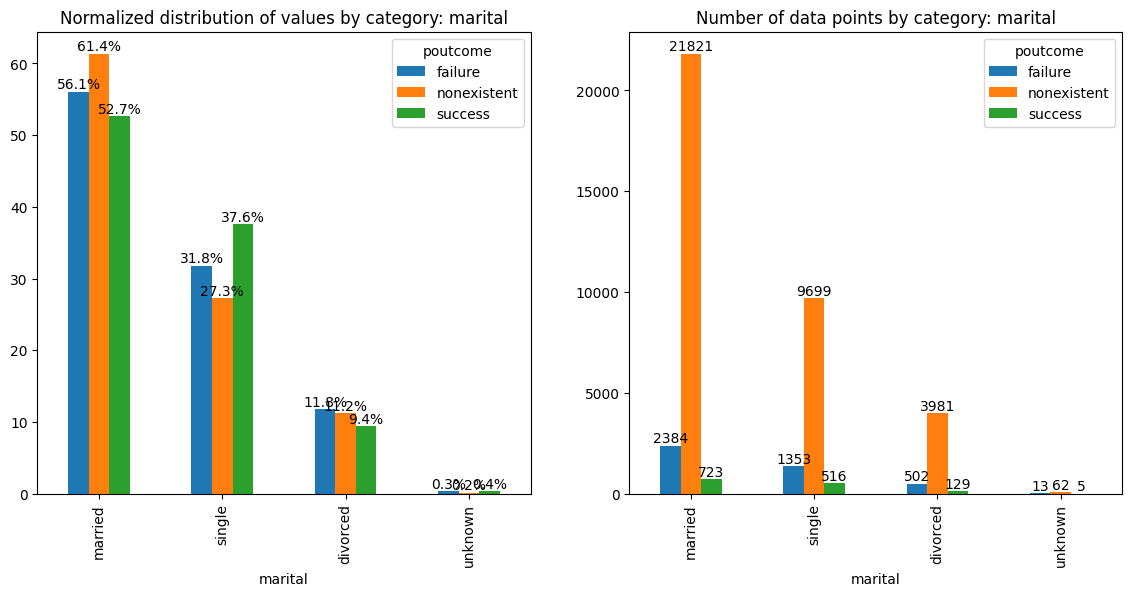

In [25]:
bi_countplot_target(df, 'marital', 'poutcome')

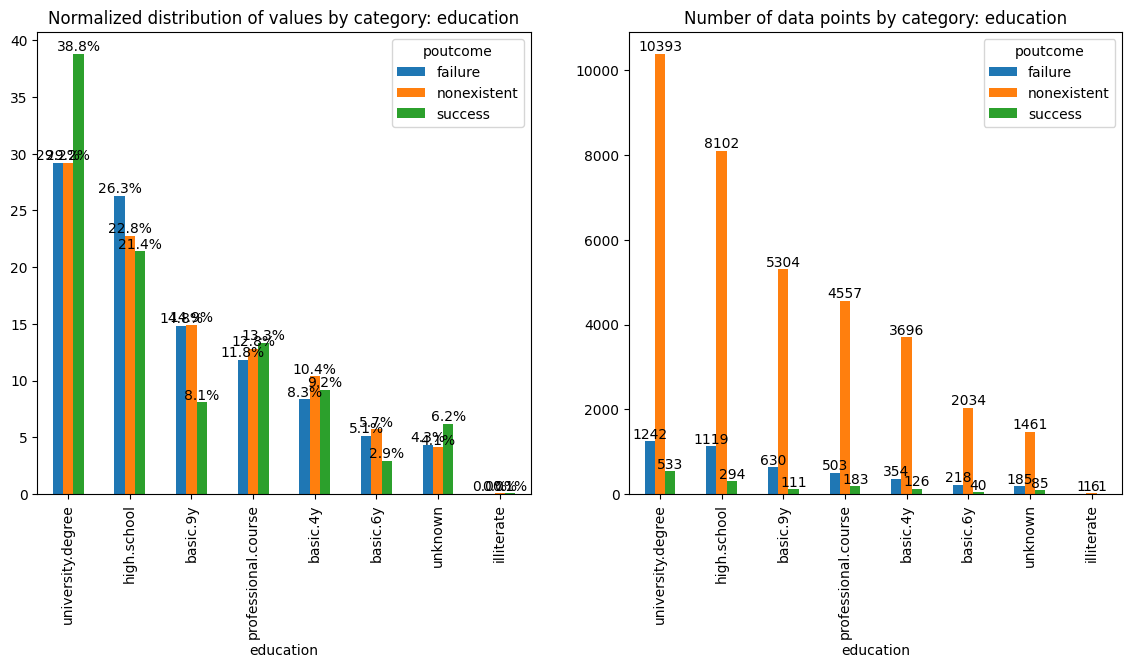

In [26]:
bi_countplot_target(df, 'education', 'poutcome')

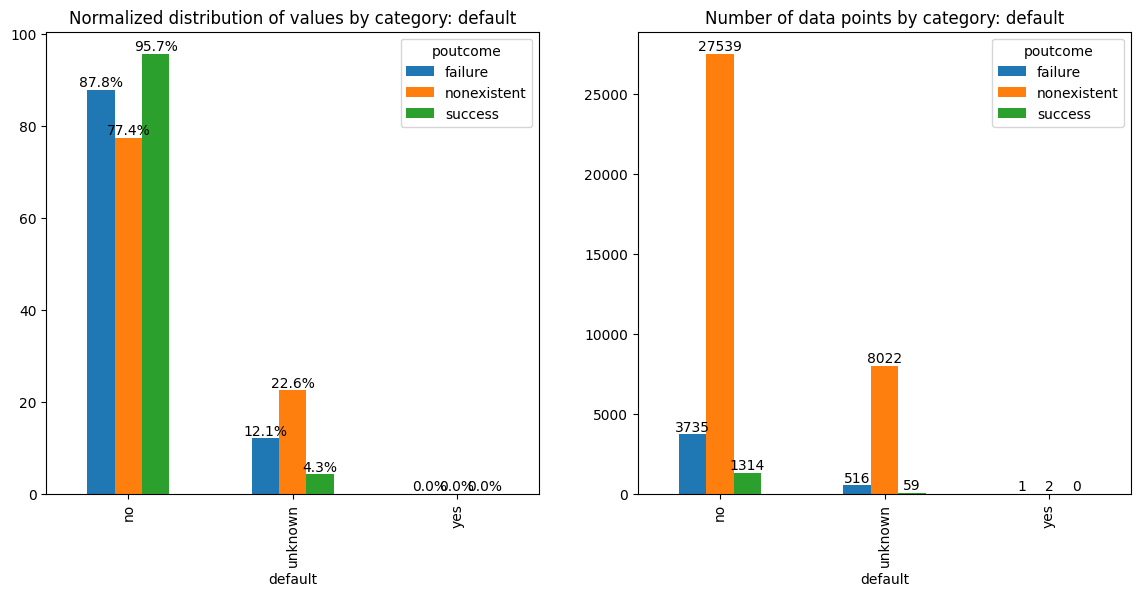

In [27]:
bi_countplot_target(df, 'default', 'poutcome')

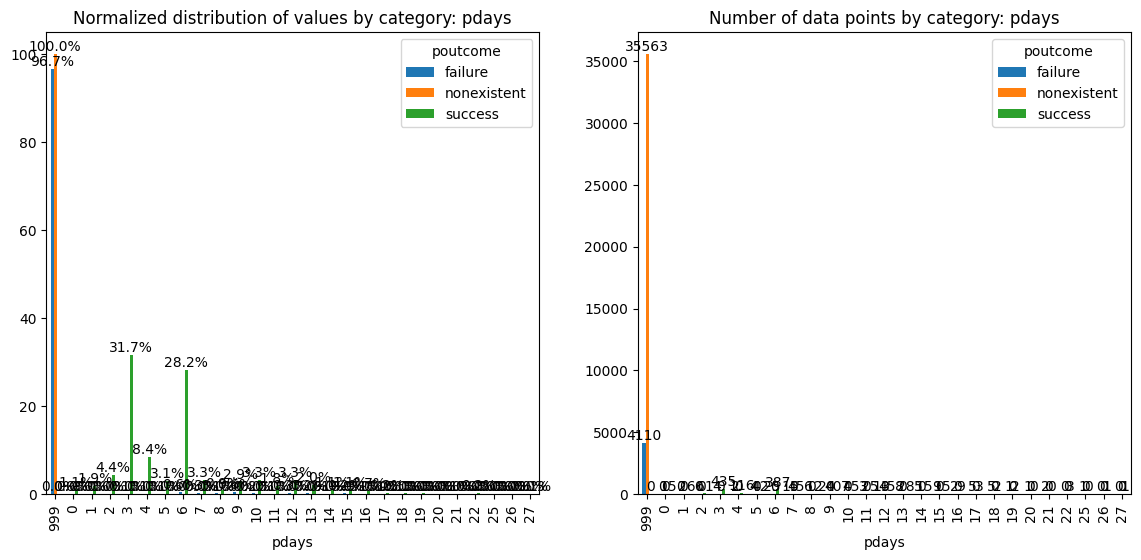

In [28]:
bi_countplot_target(df, 'pdays', 'poutcome')

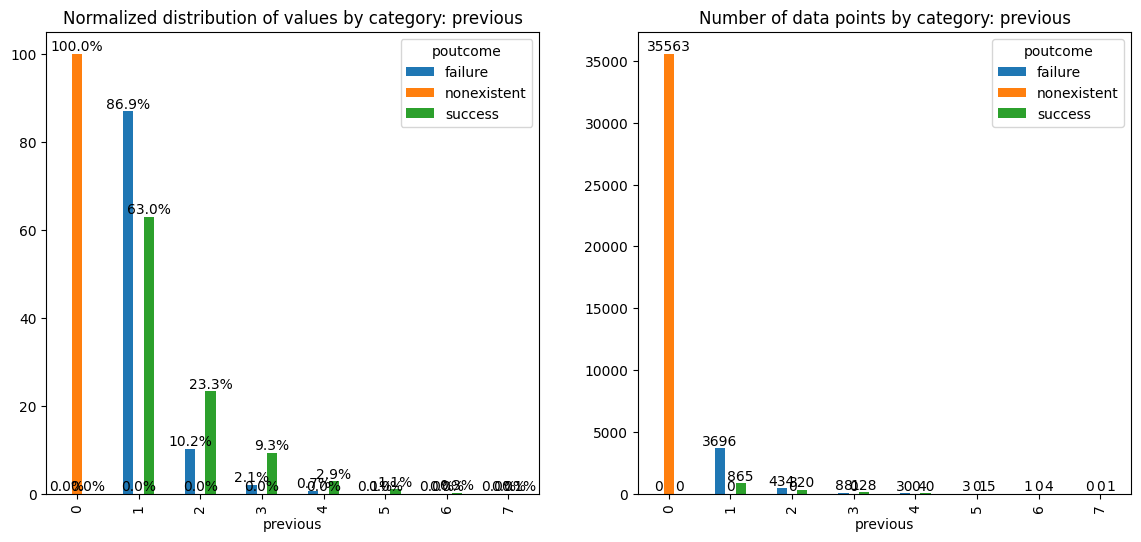

In [29]:
bi_countplot_target(df, 'previous', 'poutcome')

#### Analysis of distribution of bivariate categorical values

poutcome:

- Clients who retired, student in university or in professional course, unemployed or have an administrative job, single, doesn't have loan of any kind - have success in previous marketing campaign more often.
- Clients who have been contacted 3 to 6 days ago (pdays) - have success in previous marketing campaign.
- If a customer has been contacted from 2 to 4 times (previous) in previous campaigns, their probability of success in the current campaign are higher.

Target variable is unevenly distributed (more no)


### Converting 'y' to numerical representation

In [30]:
for col in ['y']:
  df[col] = np.where(df[col]=='yes', 1, 0) #If the condition is False (the cell value is not 'Y'), np.where() will replace that value with 0.

## Numerical variables

Calculate the minimum and maximum deviation range for numeric columns

In [31]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

Outliers for numeric columns

In [32]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Distribution plot for ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Box plot for ' + column
      plt.title(pltname)

      plt.show()

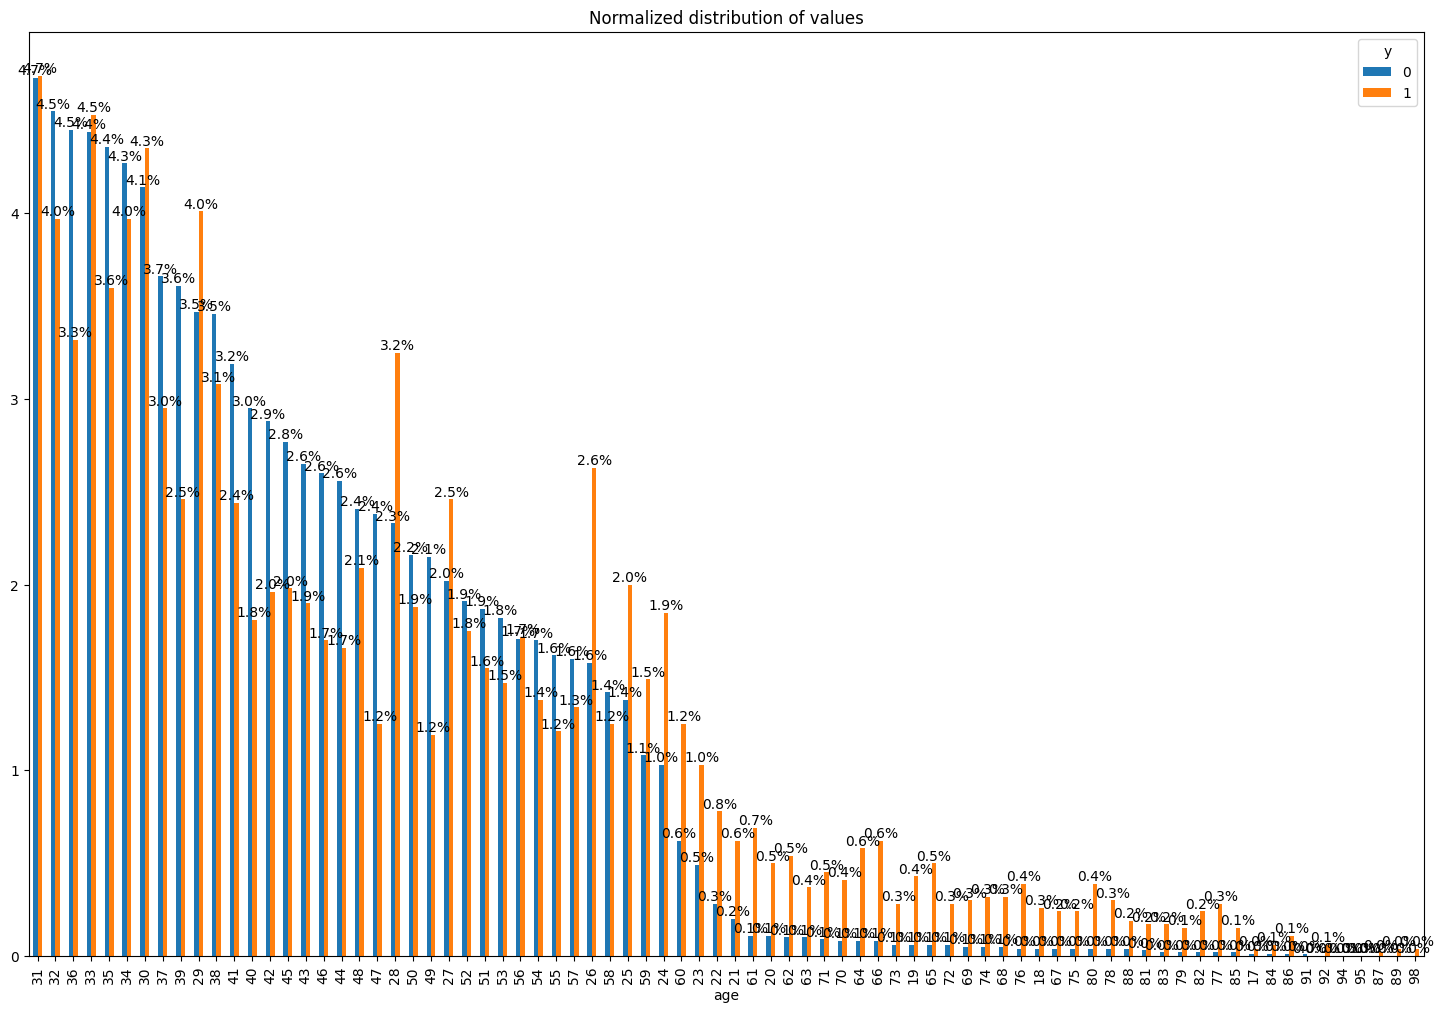

In [33]:
one_cat_countplot(df, 'age', 'y')

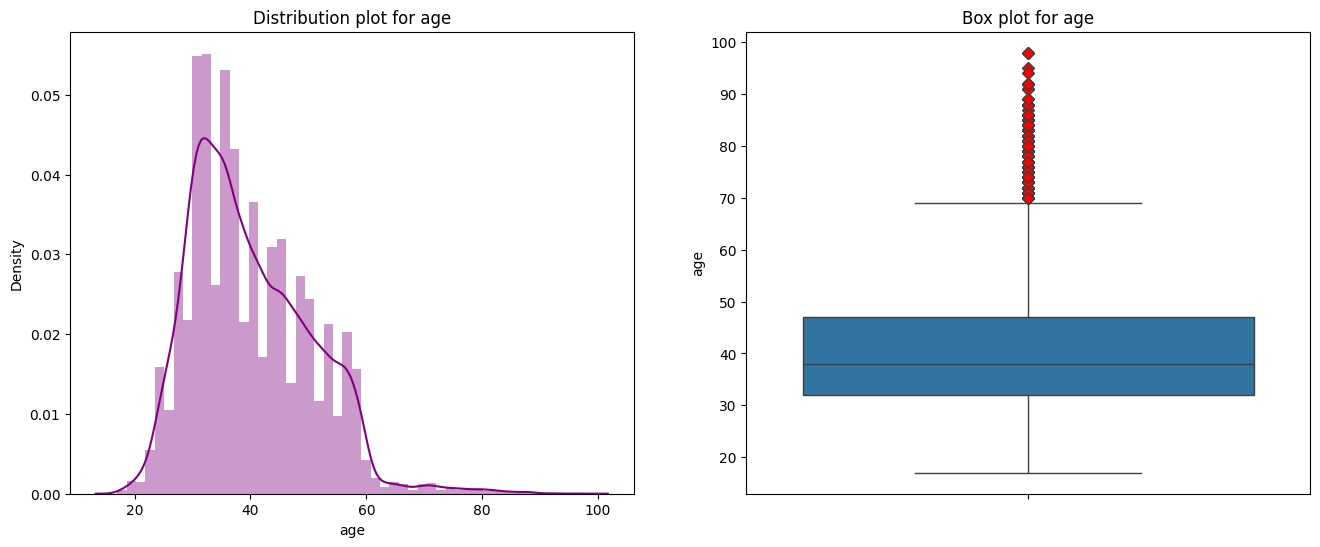

np.float64(97.0)

In [34]:
dist_box(df, 'age')
outlier_range(df, 'age')

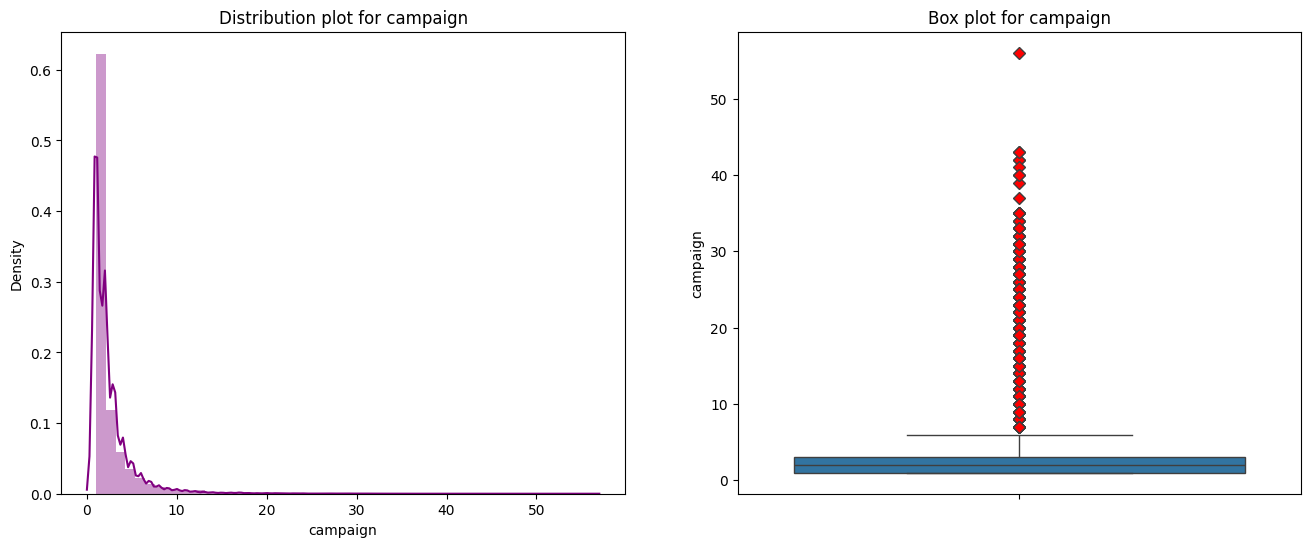

np.float64(16.0)

In [35]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

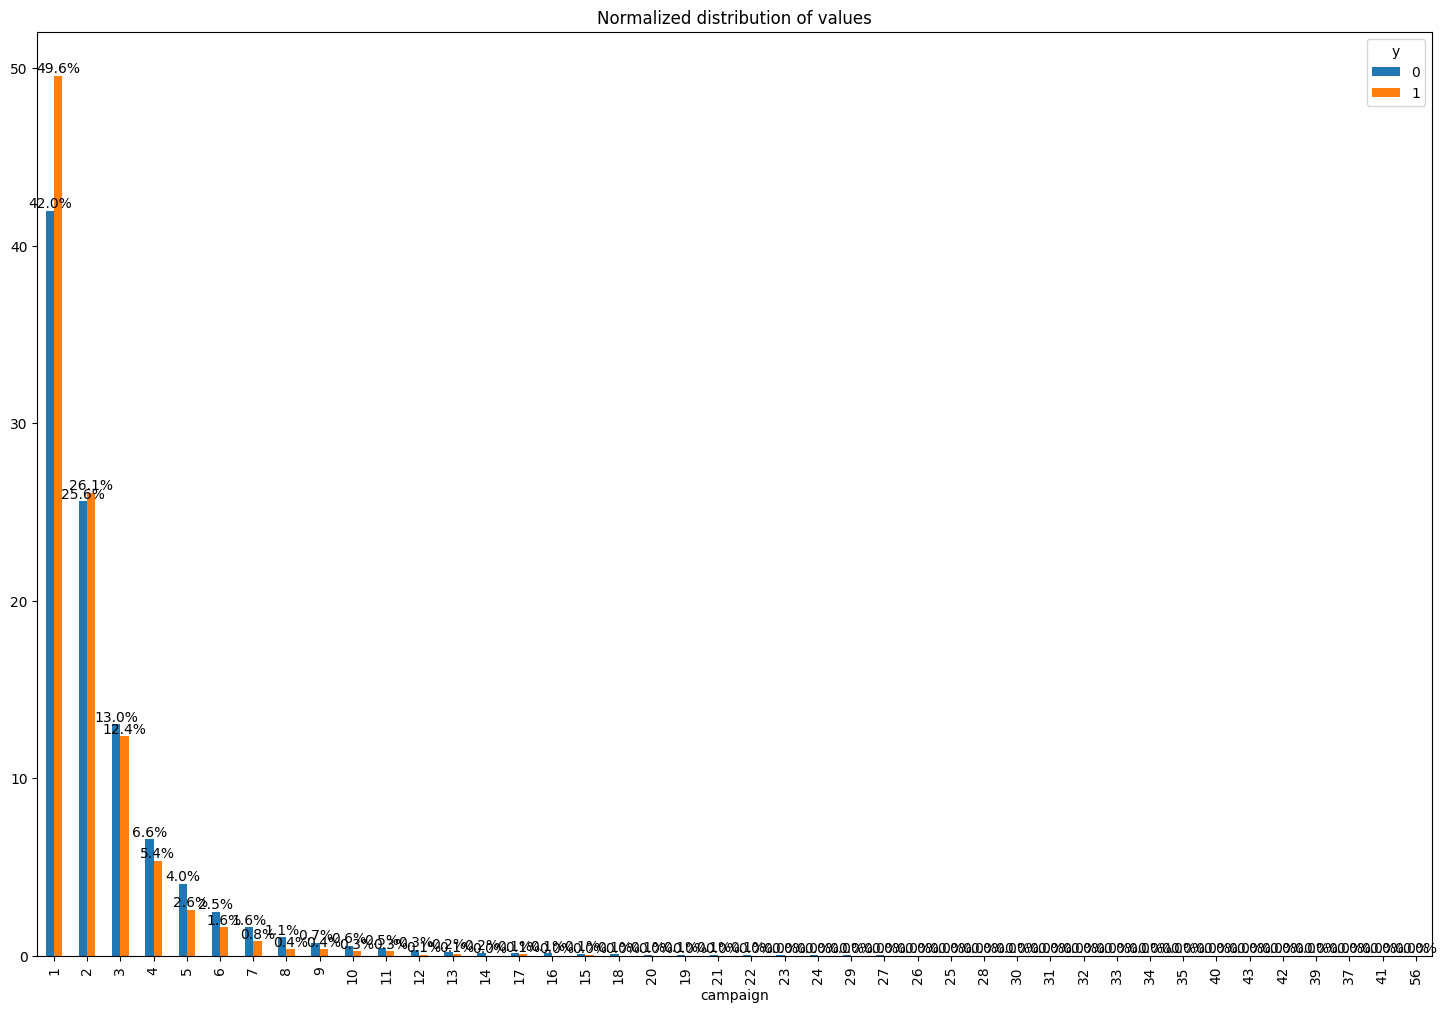

In [36]:
one_cat_countplot(df, 'campaign', 'y')

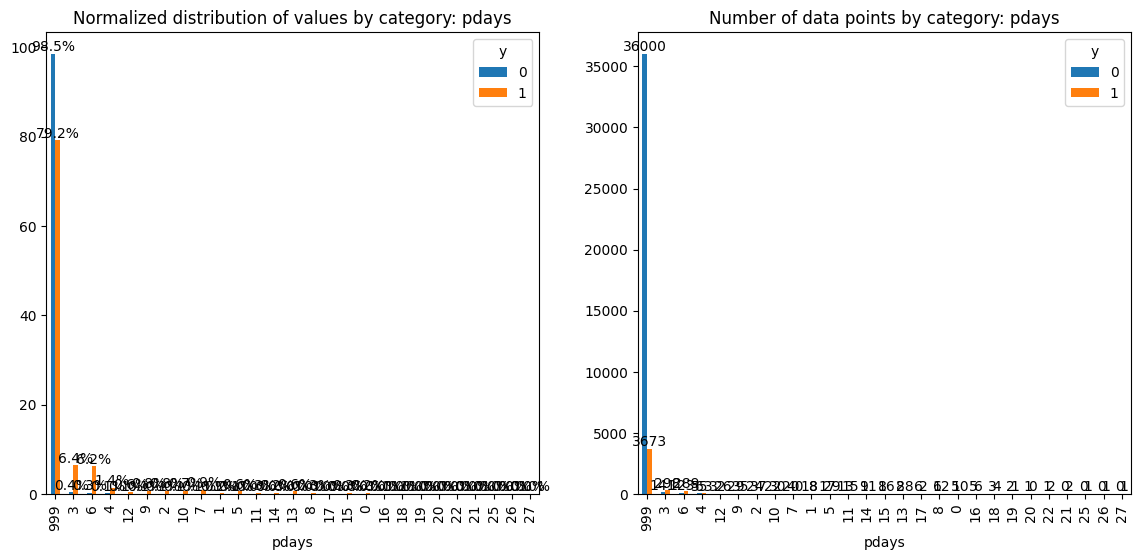

In [37]:
uni_cat_target_compare(df, 'pdays')

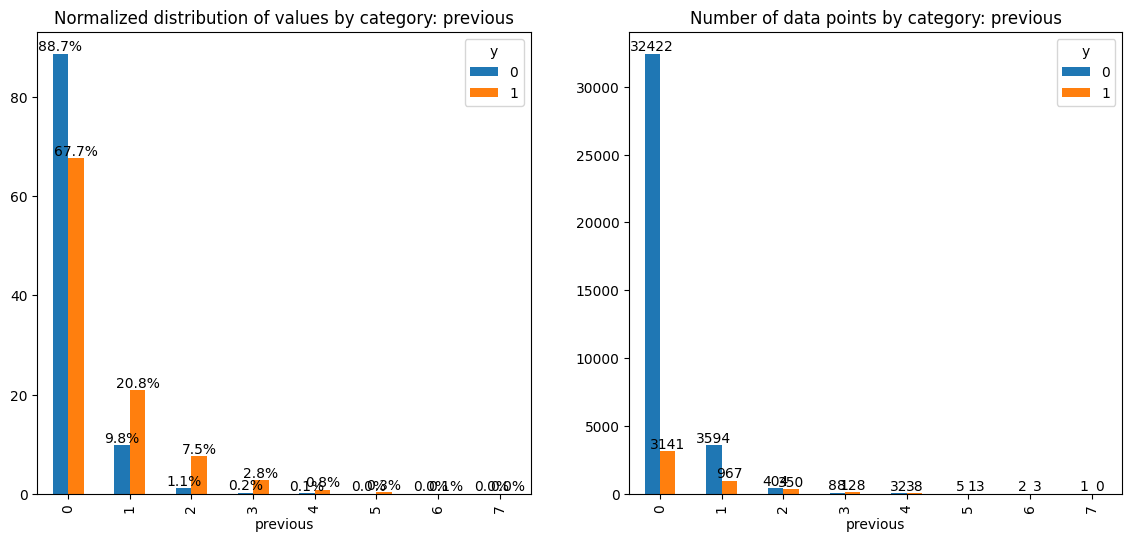

In [38]:
uni_cat_target_compare(df, 'previous')

### Analysis of outliers and distribution of numerical variables

- **campaign** (number of contacts within the current campaign): have a lot of outliers after 6. Unlikely that a client will change his mind after 3rd contact.
- **pdays** (number of days that passed by after the client was contacted in previous campaign, 999 never contacted): if client wasn`t contacted before the probability of signing a term deposit is low. Same for **previous** (number of contacts made to this client before this campaign)

**Attributes of the socio-economic context**

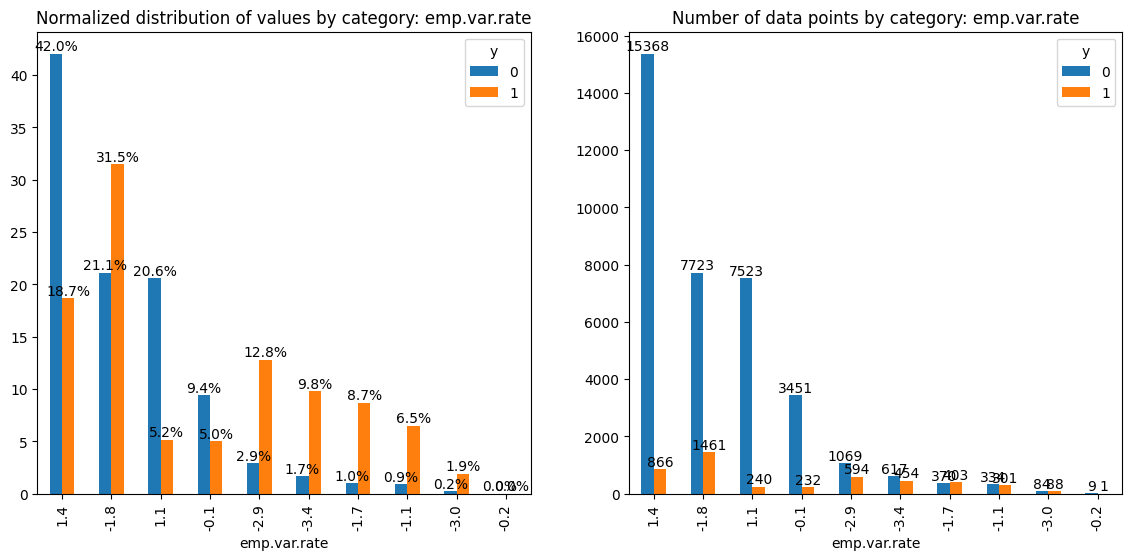

In [39]:
uni_cat_target_compare(df, 'emp.var.rate')

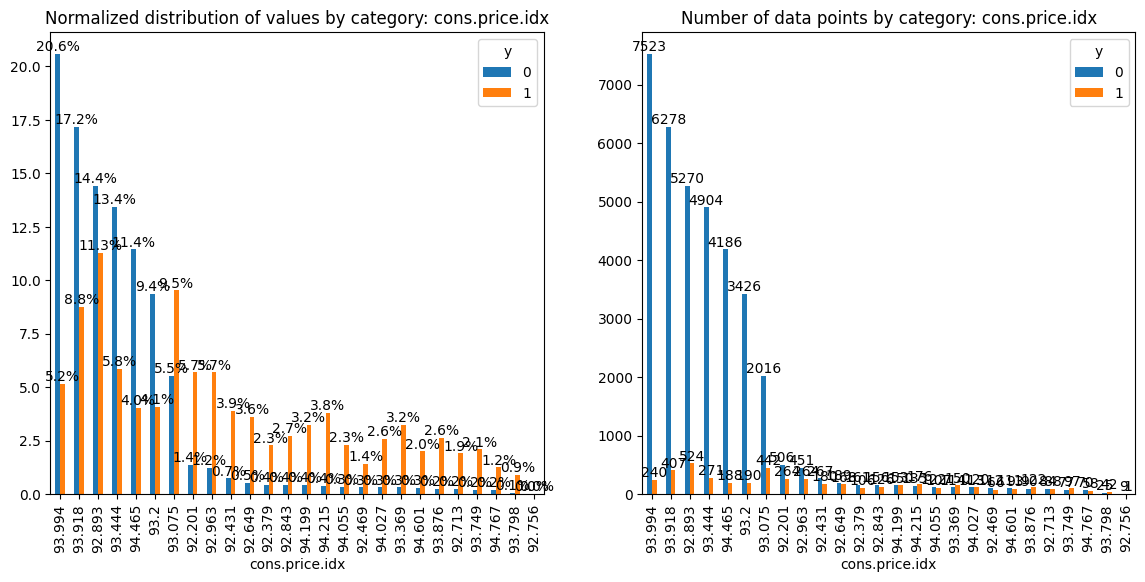

In [40]:
uni_cat_target_compare(df, 'cons.price.idx')

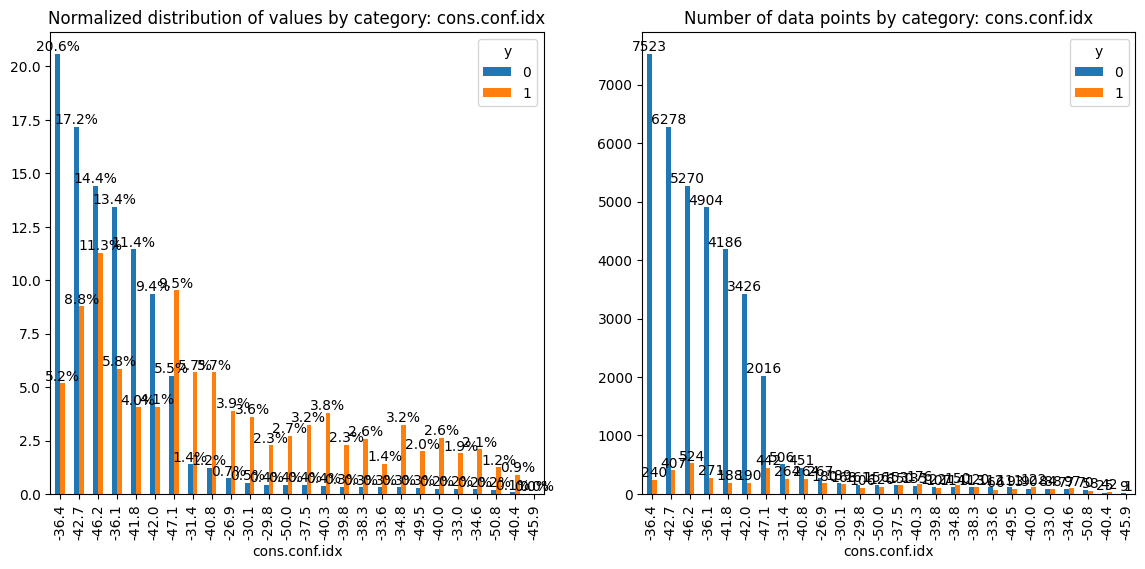

In [41]:
uni_cat_target_compare(df, 'cons.conf.idx')

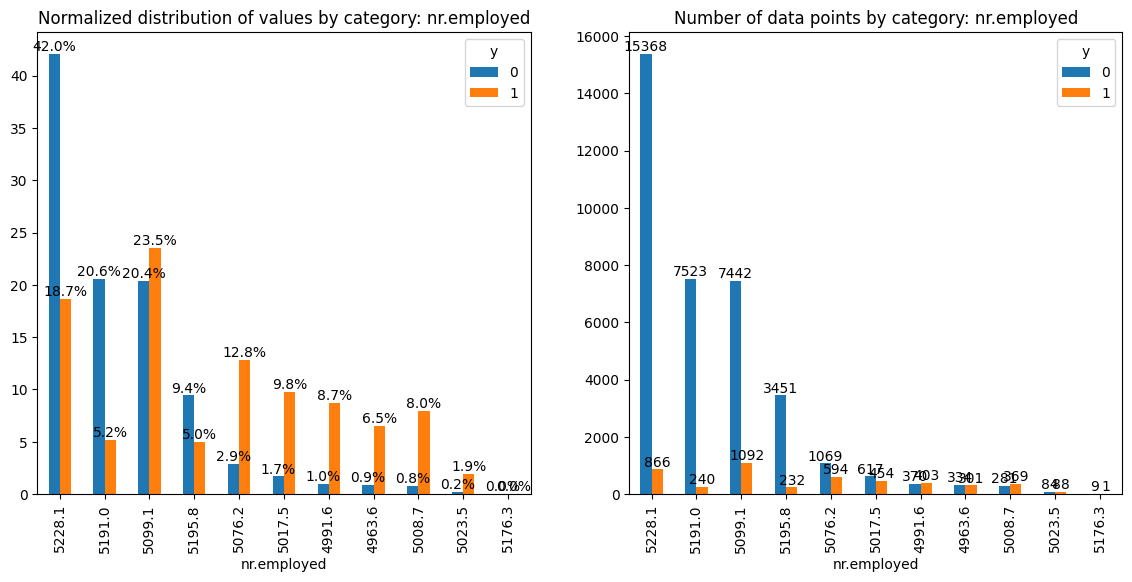

In [42]:
uni_cat_target_compare(df, 'nr.employed')

### Analysis of attributes of the socio-economic context

1. emp.var.rate (employment variation rate)

- Measures the percentage change in employment levels for a given quarter.

- High values → the labor market is growing (more people have jobs).

- Low/negative values → unemployment is increasing.

When unemployment rises, the chances of getting a loan increase.

2. cons.price.idx (consumer price index) – all values are negative

- Shows the change in prices of goods and services in the economy.

- High values → inflation, goods become more expensive.

- Low values → possible deflation (decline in prices).

Values do not affect the target variable.

3. cons.conf.idx (consumer confidence index)

- Reflects consumers’ optimism or pessimism about the economy.

- High values → people spend more.

- Low values → people save more (less spending and fewer deposits).

Values do not affect the target variable.

4. euribor3m (3-month Euribor rate)

- Euribor is the interest rate at which European banks lend money to each other.

- High values → loans become more expensive, economic activity may slow down.

- Low values → loans are cheaper, encouraging spending.

5. nr.employed (number of employed people)

- The total number of employed individuals in the country.

- Increase → a positive economic signal (more people have jobs).

- Decrease → economic difficulties (more unemployed, less spending).

The lower the number of employed people in the country, the higher the probability that a client will take out a term deposit.

### Correlation analysis of numerical variables

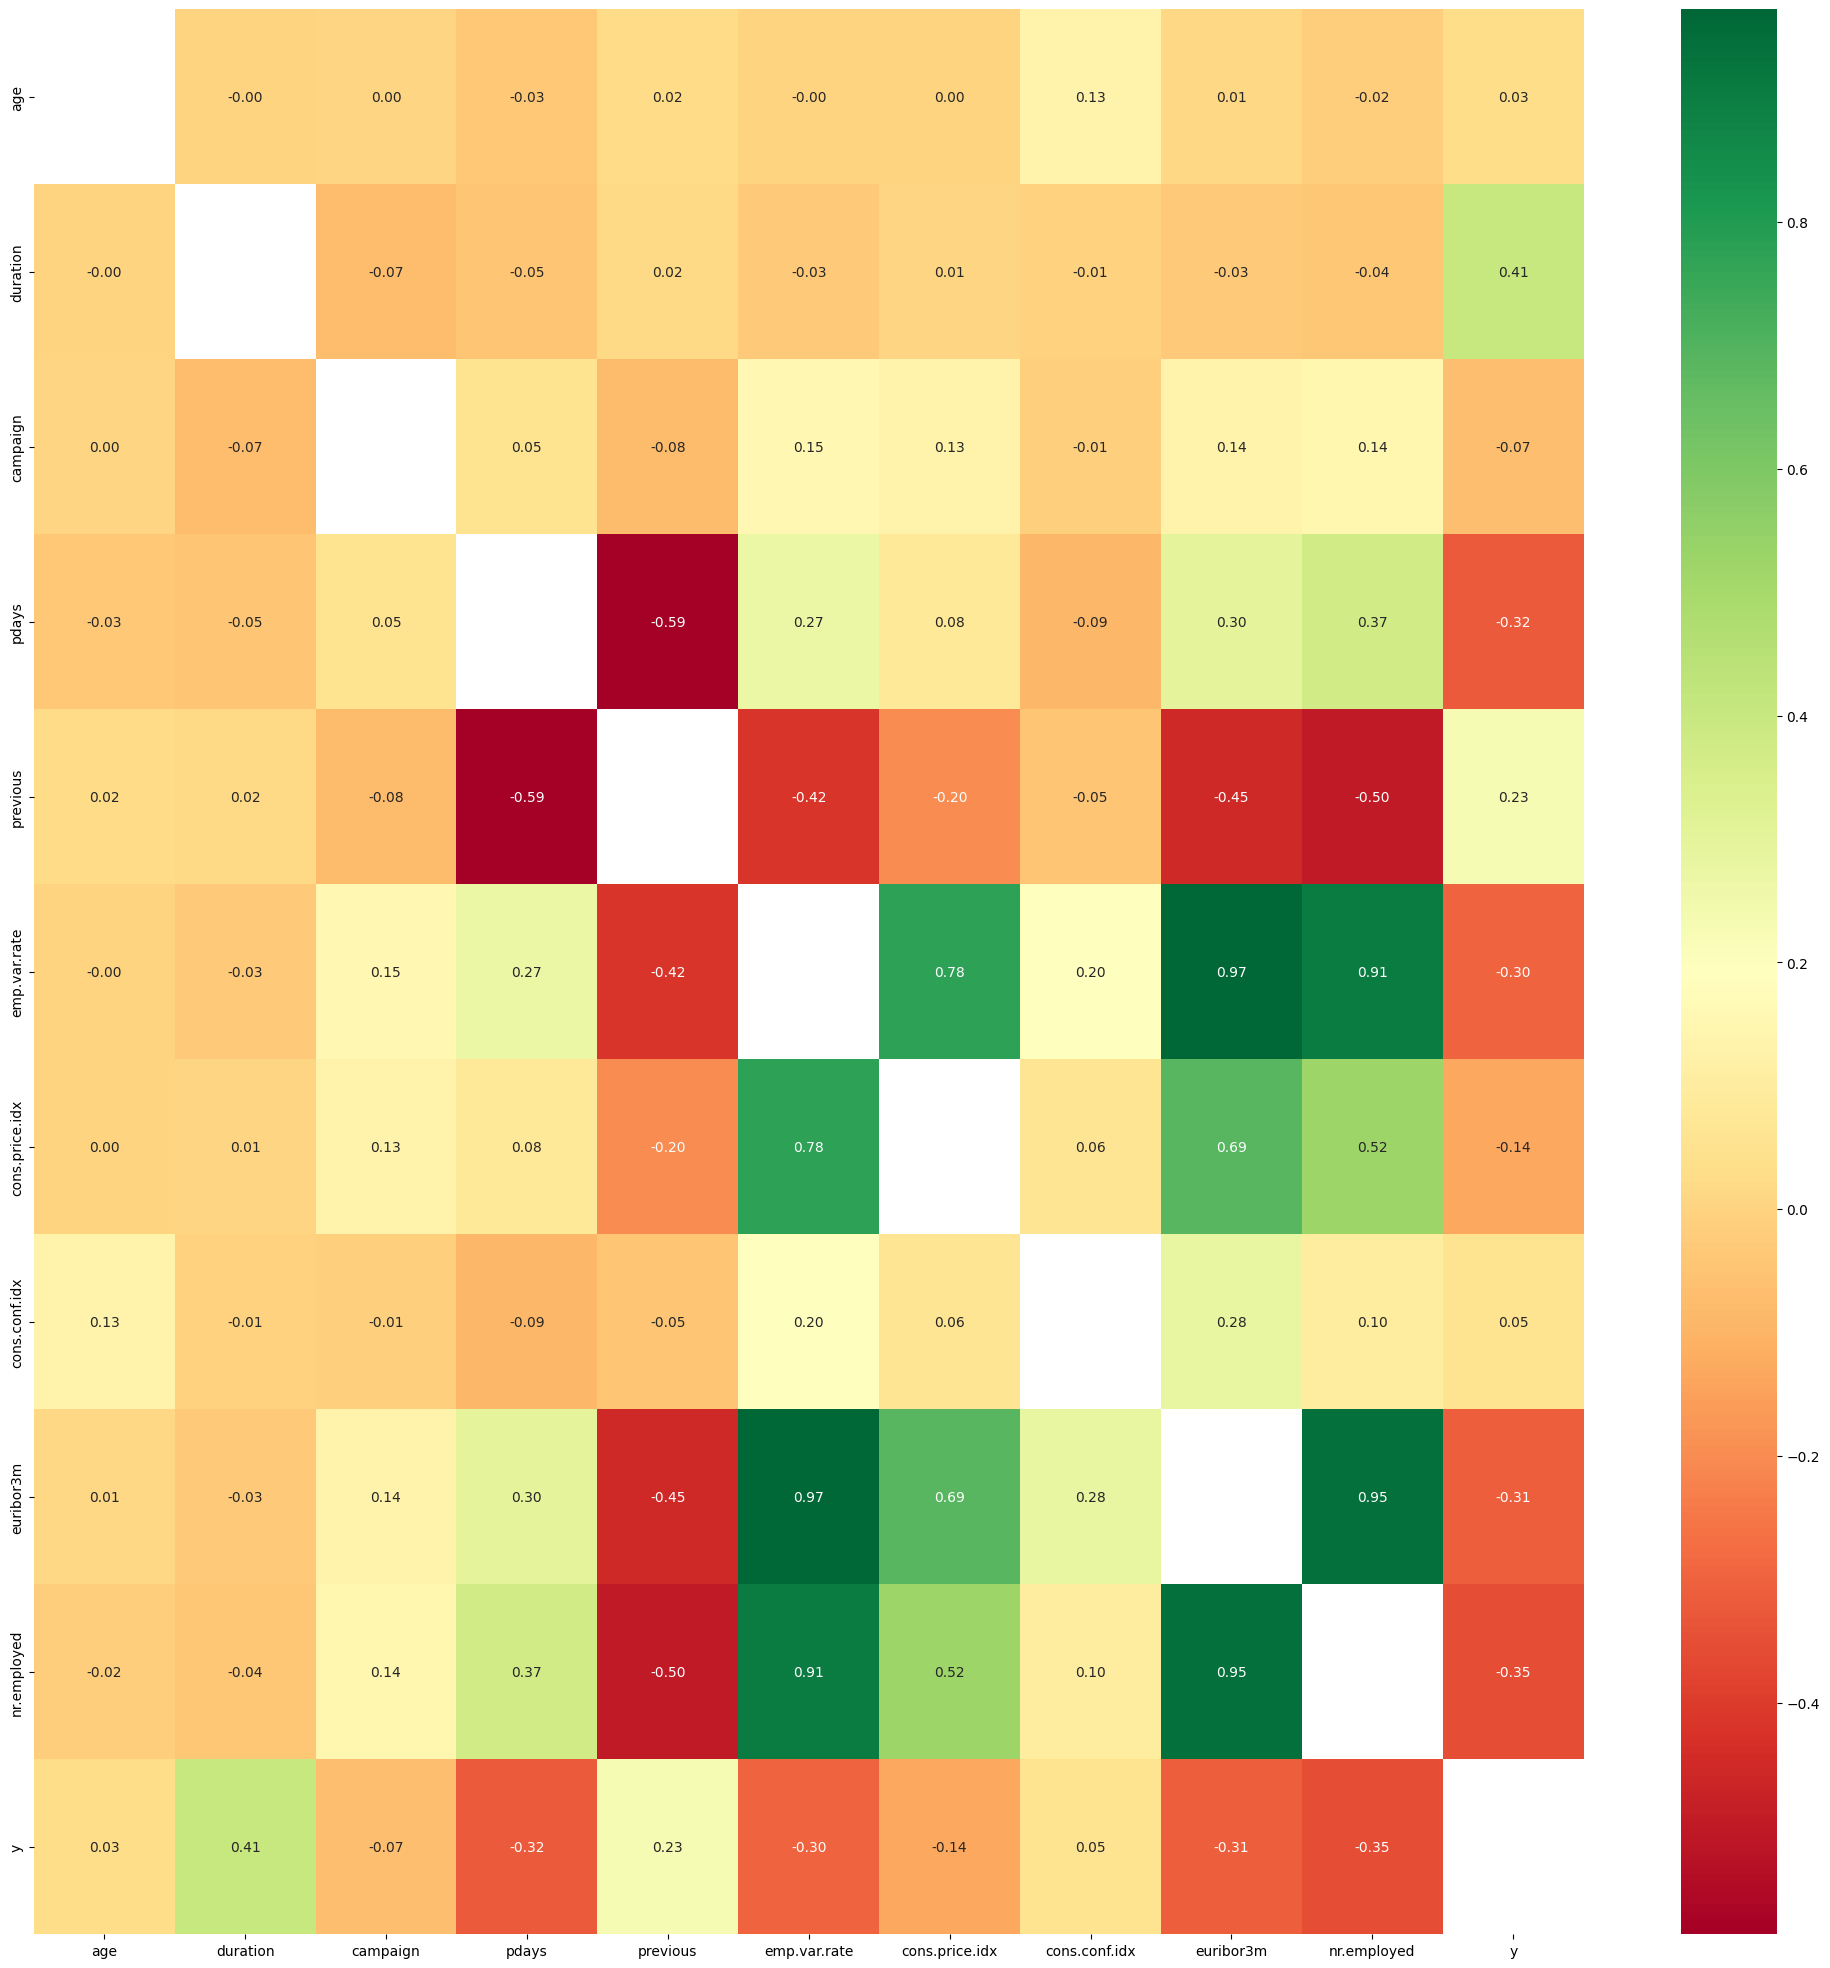

In [43]:
corr_df = df.select_dtypes(include=["int64","float64"]).corr()
corr_df['pdays'] = corr_df['pdays'].replace(999, 0)

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df[corr_df < 0.9999], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

- emp.var.rate (employment variation rate) correlates with nr.employed (number of employed people)

- euribor3m (3-month Euribor rate) correlates with emp.var.rate (employment variation rate)

- euribor3m correlates with nr.employed

- cons.price.idx (consumer price index) correlates with emp.var.rate (employment variation rate)

- cons.price.idx correlates with euribor3m and nr.employed

All socio-economic attributes are strongly positively correlated with each other.

- previous (number of contacts before this campaign) is negatively correlated with nr.employed, euribor3m, emp.var.rate, and cons.price.idx

- pdays (number of days since the last contact in a previous campaign) is strongly negatively correlated with previous

Except for previous and duration, all variables are negatively correlated with the target variable.

- duration (0.41) is positively correlated with the target variable

- pdays (-0.32) is negatively correlated with y

### Hypotheses regarding the influence of individual features on the target variable y

- The result of the previous marketing campaign (poutcome) is an important feature: if the outcome of the previous campaign was successful, the likelihood of the client taking a deposit in the current campaign is higher.

- The way (contact = cellular) and when (month, day_of_week) the client was contacted is also important.

- The lower the number of employed people in the country (nr.employed, emp.var.rate), the higher the likelihood that the client will take a term deposit.

- Despite high success rates, with clients who have not been contacted previously, there is a greater chance that the client will take a deposit when they have already been contacted before (pdays, previous).

## 2. Plan


Since the task is to predict whether a client will sign a term deposit (yes/no, 1/0) based on input data, binary classification methods should be used, such as:

Logistic Regression

K-Nearest Neighbors (K-NN)

Decision Trees

Given that there is a significant class imbalance (with no accounting for 88.73% and yes for 11.27%), techniques like oversampling or undersampling might be needed to balance the dataset.

For model evaluation, it is better to choose AUROC (Area Under the Receiver Operating Characteristic Curve). AUROC is a great metric when comparing models, as it shows how well the model distinguishes between classes (0 and 1). It also allows adjusting the decision threshold, either to avoid false positives or to make the model more sensitive to capture as many positive cases as possible.

This approach will help ensure a more effective and fair model evaluation, especially considering the imbalanced classes.


# 3. Preprocessing

## Outliers

Detection of outliers and removal of those above the 95th percentile

In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


Identification of outliers after the 95th percentile

In [45]:
# Splitting the data into two groups
df1 = df[df['y'] == 1]
df0 = df[df['y'] == 0]

def outlier_analysis(df0, df1, col_name):

  print(f"{col_name} - Signed deposit")
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value1 = (Q1 - 1.5 * IQR)
  Max_value1 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which outliers exist: {}".format(Min_value1))
  print("Maximum value, above which outliers exist: {}".format(Max_value1))

  print(f"\n{col_name} - Did not sign deposit")
  Q1 = df0[col_name].quantile(0.25)
  Q3 = df0[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value2 = (Q1 - 1.5 * IQR)
  Max_value2 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which outliers exist: {}".format(Min_value2))
  print("Maximum value, above which outliers exist: {}".format(Max_value2))

  return Max_value1, Max_value2

def kde_no_outliers(df0, df1, Max_value1, Max_value2, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column], label='Signed deposit')
  sns.kdeplot(df0[df0[column] <= Max_value2][column], label='Did not sign deposit')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

def one_d_num_analysis2(df0, df1, col_name):
  Max_value1, Max_value2 = outlier_analysis(df0, df1, col_name)
  print("\nRemoving outliers and plotting the distribution chart")
  kde_no_outliers(df0, df1, Max_value1, Max_value2, col_name)

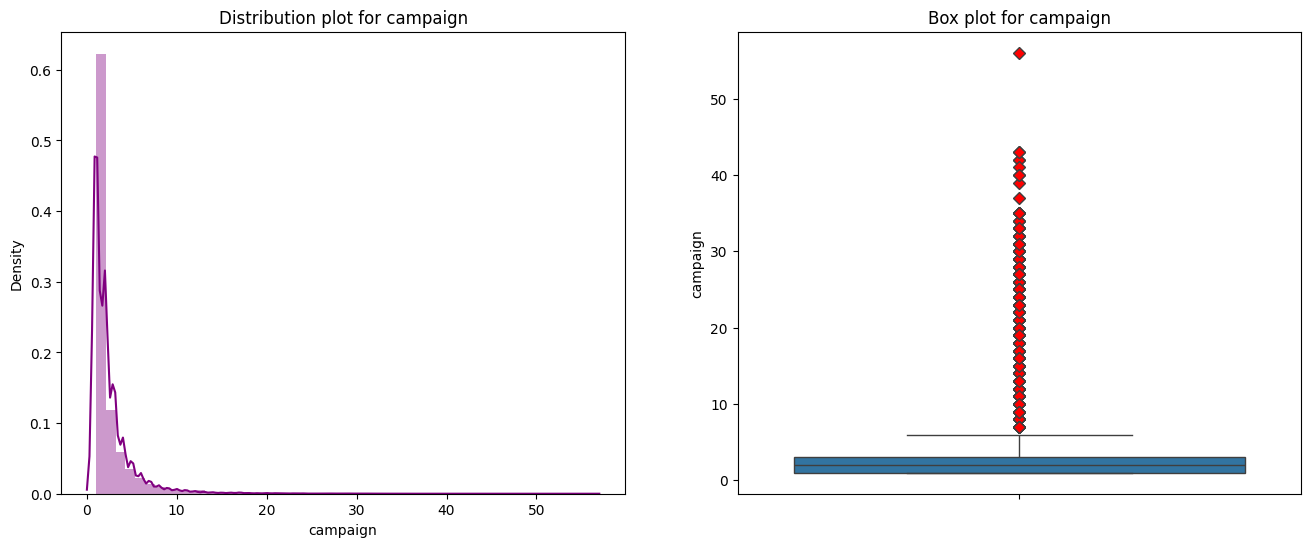

np.float64(16.0)

In [46]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

campaign - Signed deposit
4.0
Minimum value, below which outliers exist: -5.0
Maximum value, above which outliers exist: 11.0

campaign - Did not sign deposit
6.0
Minimum value, below which outliers exist: -8.0
Maximum value, above which outliers exist: 16.0

Removing outliers and plotting the distribution chart


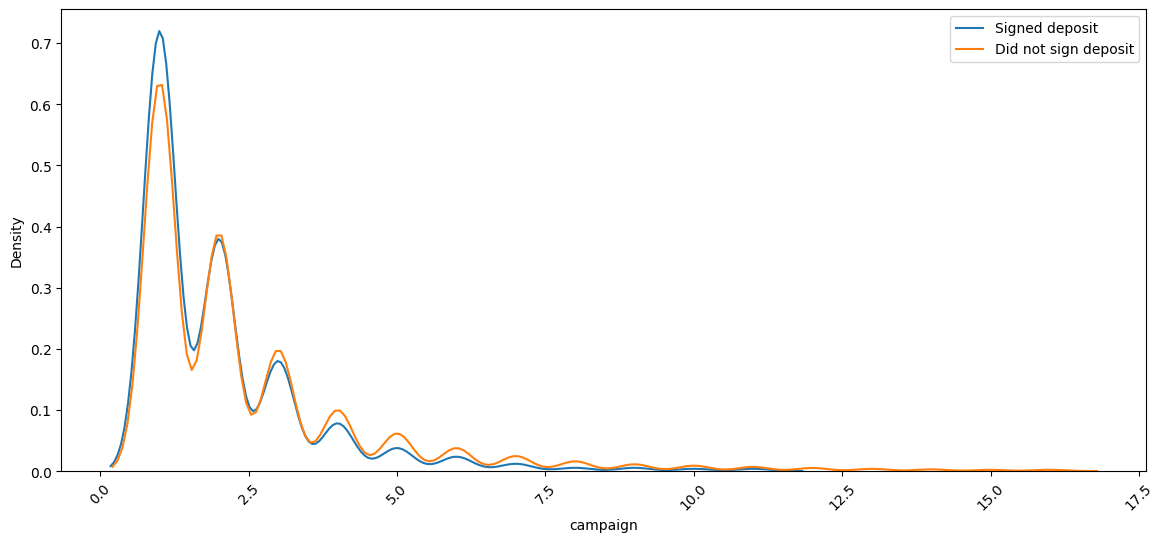

In [47]:
one_d_num_analysis2(df0, df1, 'campaign')

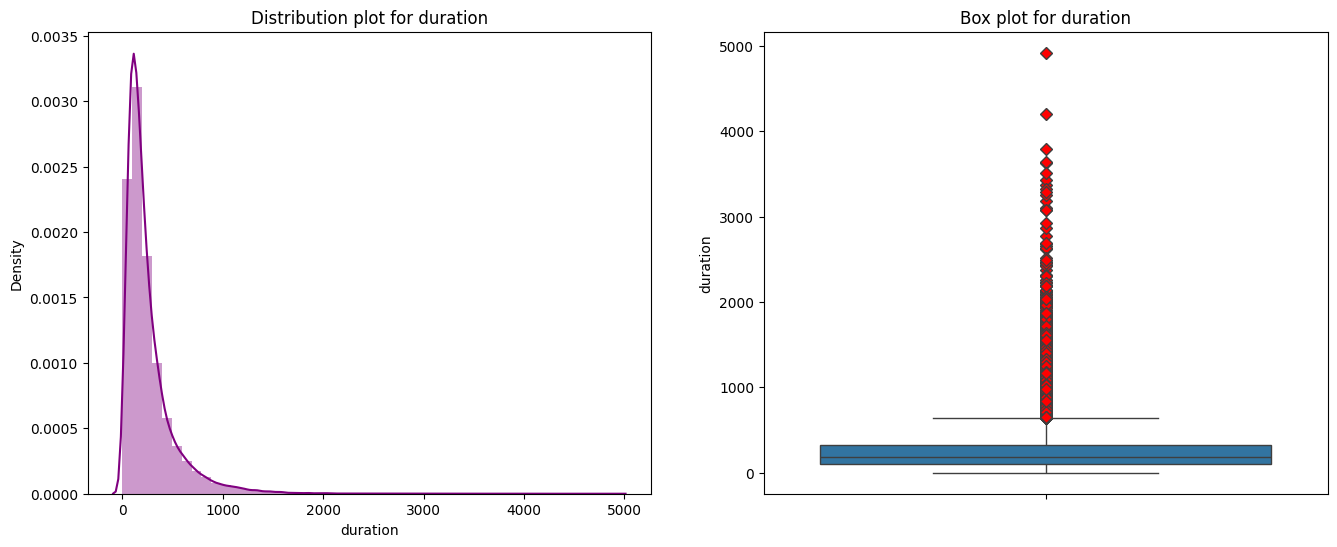

np.float64(1728.6250000000036)

In [48]:
dist_box(df, 'duration')
outlier_range(df, 'duration')

duration - Signed deposit
1058.0
Minimum value, below which outliers exist: -1334.0
Maximum value, above which outliers exist: 2898.0

duration - Did not sign deposit
500.0
Minimum value, below which outliers exist: -655.0
Maximum value, above which outliers exist: 1345.0

Removing outliers and plotting the distribution chart


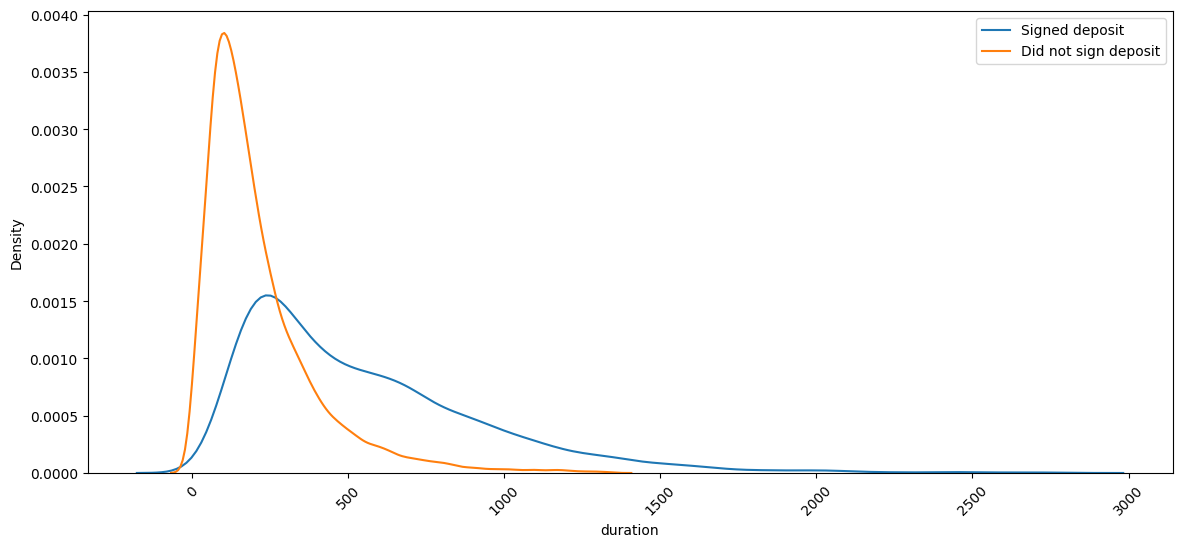

In [49]:
one_d_num_analysis2(df0, df1, 'duration')

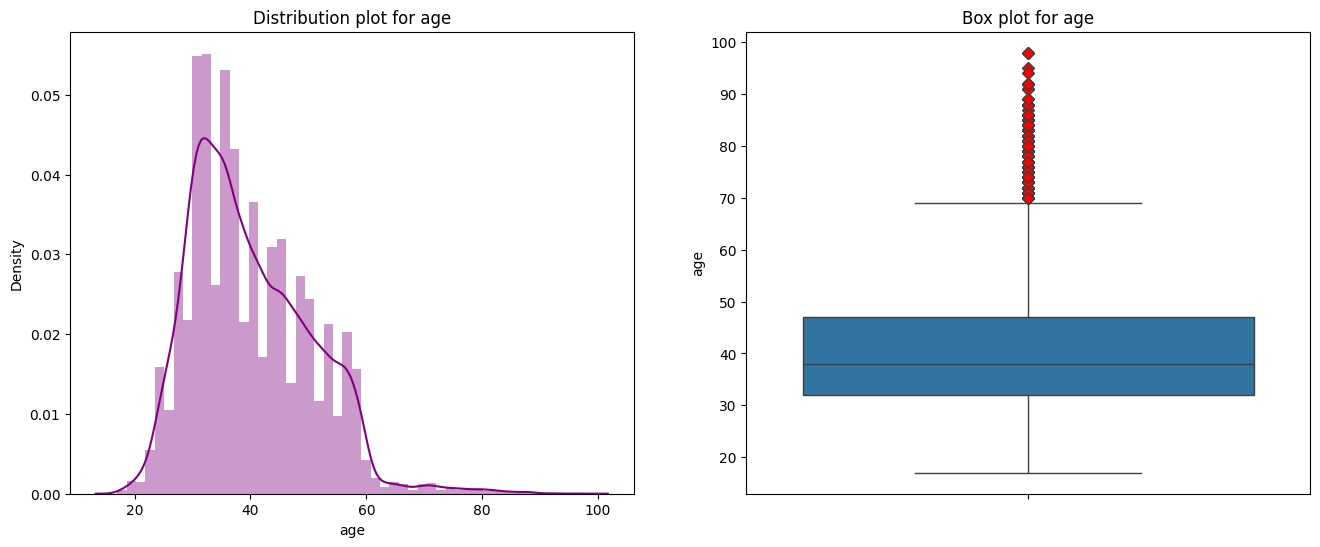

np.float64(97.0)

In [50]:
dist_box(df, 'age')
outlier_range(df, 'age')

age - Signed deposit
38.0
Minimum value, below which outliers exist: -26.0
Maximum value, above which outliers exist: 126.0

age - Did not sign deposit
25.0
Minimum value, below which outliers exist: -5.5
Maximum value, above which outliers exist: 94.5

Removing outliers and plotting the distribution chart


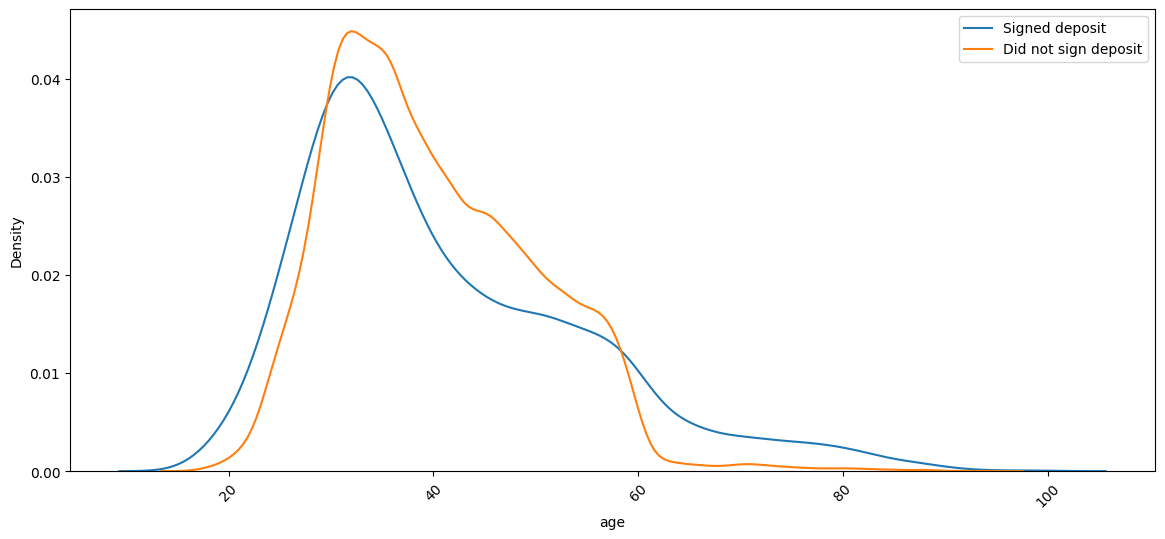

In [51]:
one_d_num_analysis2(df0, df1, 'age')

To make the interpretation easier, pdays values of 999 should be converted to 0

In [52]:
df['pdays'] = df['pdays'].replace(999, 0)

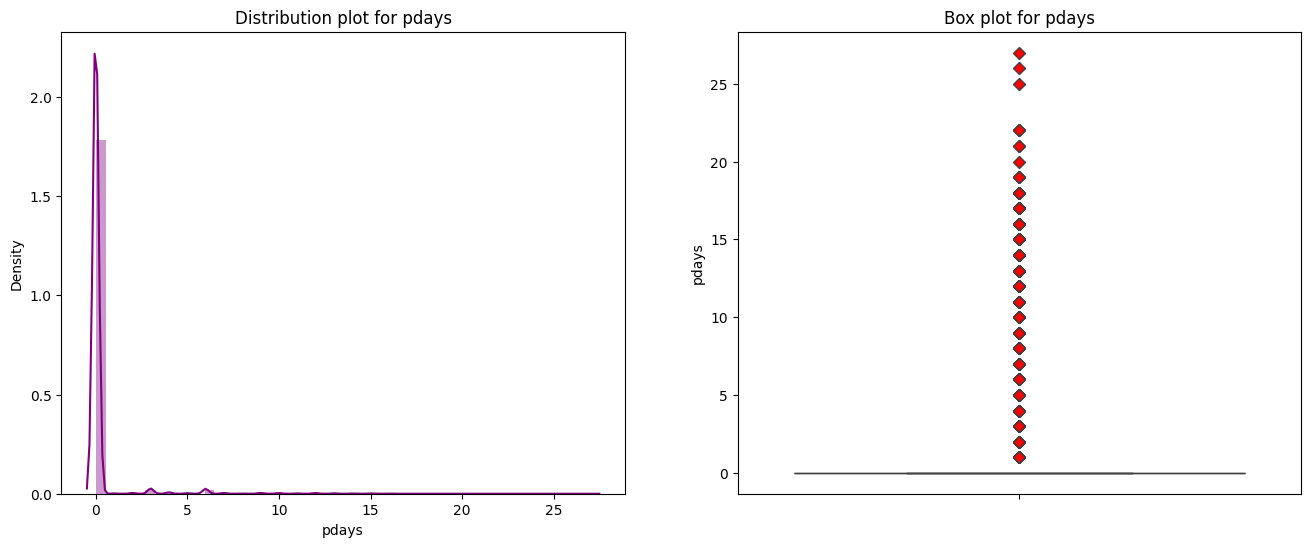

np.float64(0.0)

In [53]:
dist_box(df, 'pdays')
outlier_range(df, 'pdays')

pdays - Signed deposit
0.0
Minimum value, below which outliers exist: 999.0
Maximum value, above which outliers exist: 999.0

pdays - Did not sign deposit
0.0
Minimum value, below which outliers exist: 999.0
Maximum value, above which outliers exist: 999.0

Removing outliers and plotting the distribution chart


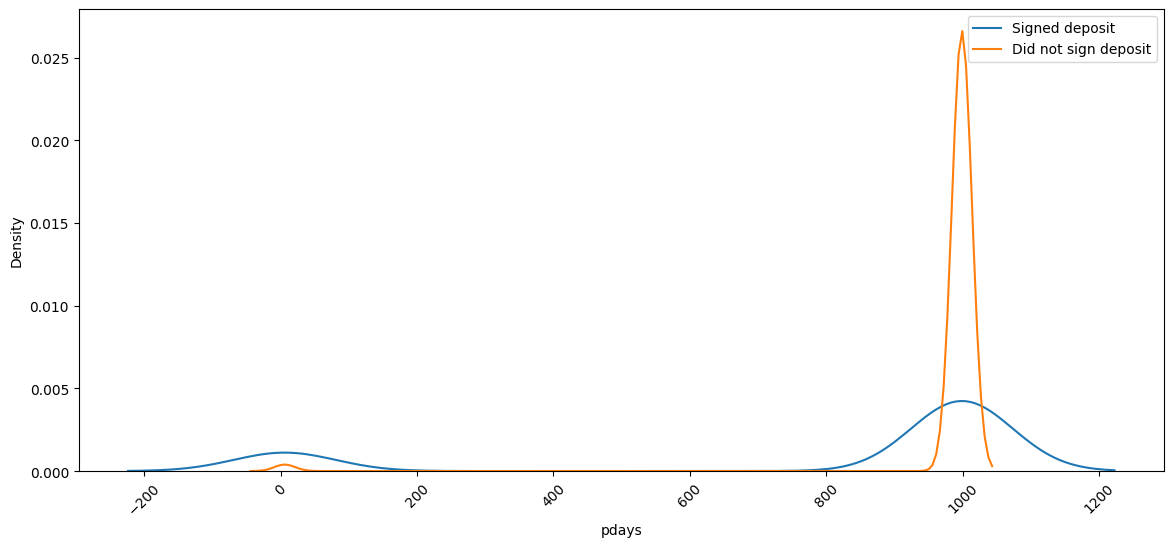

In [54]:
one_d_num_analysis2(df0, df1, 'pdays')

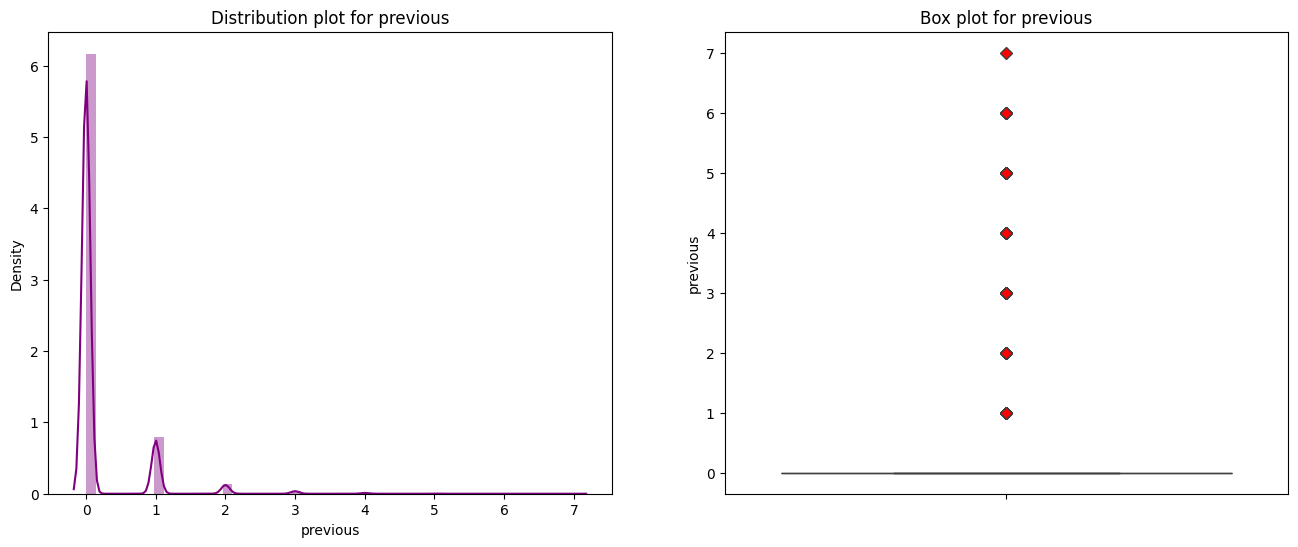

np.float64(2.5)

In [55]:
dist_box(df, 'previous')
outlier_range(df, 'previous')

previous - Signed deposit
2.0
Minimum value, below which outliers exist: -3.0
Maximum value, above which outliers exist: 5.0

previous - Did not sign deposit
1.0
Minimum value, below which outliers exist: -1.5
Maximum value, above which outliers exist: 2.5

Removing outliers and plotting the distribution chart


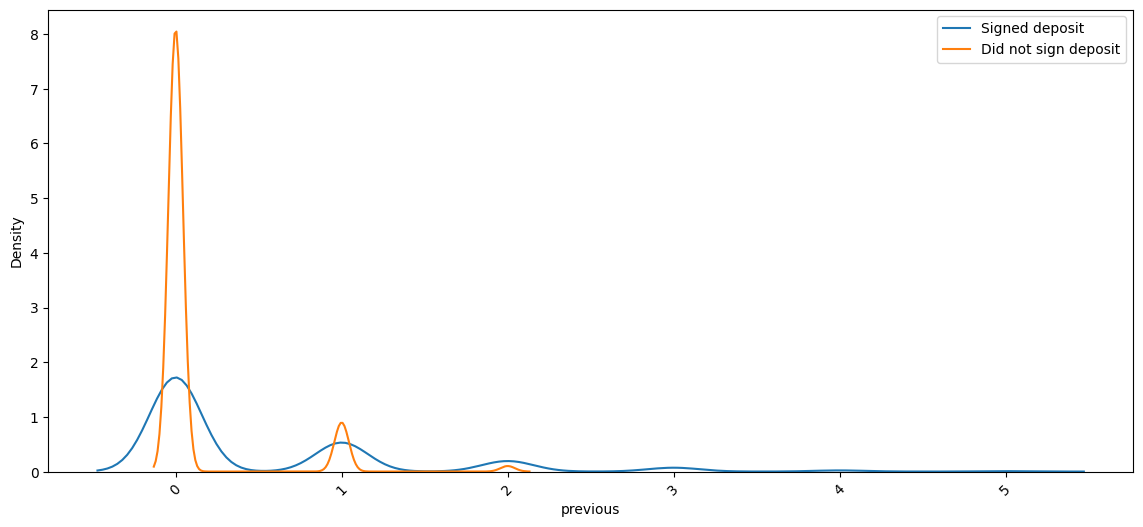

In [56]:
one_d_num_analysis2(df0, df1, 'previous')

### Outliers analysis

- **age**: Outliers after 69.
- **campaign**  (number of contacts within the current campaign): Has some residual values above 15.
- **duration**: Has outliers after the 2000 value.
- **pdays**: Has a few residual values above 15.
- **previous**: Has a few residual values above 3.

Removing outliers from duration, campaign, pdays, and previous may improve the model, as very small values do not significantly impact the target variable. It's worth removing them to observe any improvement in the model's performance.

In [57]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Initialize
df_filtered = df.copy()

# Remove outliers from specified columns
for column in ['campaign', 'duration', 'pdays', 'previous']:
    df_filtered = remove_outliers_iqr(df_filtered, column)

df = df_filtered

In [58]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00
mean,39.95,251.37,2.44,0.00,0.11,0.16,93.58,-40.58,3.72,5172.18,0.09
std,10.17,235.39,2.13,0.00,0.34,1.53,0.57,4.52,1.68,67.33,0.29
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,101.00,1.00,0.00,0.00,-1.80,93.08,-42.70,1.41,5099.10,0.00
50%,38.00,177.00,2.00,0.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,315.00,3.00,0.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,1730.00,16.00,0.00,2.00,1.40,94.77,-26.90,5.04,5228.10,1.00


## Feature engineering

In [59]:
# Define a mapping between education categories and numerical values
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}

# Convert the 'education' column to numerical representation
df['education_numeric'] = df['education'].map(education_mapping)

# Define bins using numerical values
bins = [0, 3, 4, 6, 8]

# Use pd.cut with numerical bins and labels
df['education_bins'] = pd.cut(df['education_numeric'], bins=bins,
                               labels=['primary', 'secondary', 'higher',
                                       'unknown'], include_lowest=True,
                                      duplicates='drop', ordered=False)
# drop the temporary columns
df = df.drop(['education_numeric', 'education'], axis=1)

In [60]:
# Create a new categorical column 'age_bin' by binning the 'age' column into 3 groups:
# - 0 to 30 → 'young'
# - 30 to 50 → 'middle-aged'
# - 50 to 100 → 'senior'
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])
df = df.drop(['age'], axis=1)

In [61]:
# Sum current and previous contacts into a new 'total_contacts' column
df['total_contacts'] = df['campaign'] + df['previous']

## Splitting

In [62]:
# Create training, validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['y'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['y'], random_state=42)

# Create inputs and targets
input_cols = list([col for col in df.columns if col != 'y'])
target_col = 'y'
train, train_targets = train_df[input_cols], train_df[target_col]
val, val_targets = val_df[input_cols], val_df[target_col]
test, test_targets = test_df[input_cols], test_df[target_col]


# Identify numeric and categorical columns
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

## Categorical features

The dataset contains 10 numerical and 11 categorical columns, including:

- 1 binary: contact (cellular, telephone)

- 3 multi-categorical, which have yes, no, unknown values: default, housing, loan

- 5 multi-categorical (more than 3 values) with unordered categories: job, marital, education, month, day_of_week

- 1 ordinal column: poutcome

In [63]:
train[categorical_cols].nunique()

,0
job,12
marital,4
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3
education_bins,4


Encoding columns with binary values

In [64]:
df['contact'].value_counts()

,count
contact,
cellular,24499
telephone,14708


In [65]:
contact_flag = {'telephone': 0, 'cellular': 1}
train['contact_flag'] = train.contact.map(contact_flag)
val['contact_flag'] = val.contact.map(contact_flag)
test['contact_flag'] = test.contact.map(contact_flag)

OrdinalEncoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['failure', 'nonexistent', 'success']]) # defining the order of categories
ordenc.fit(train[['poutcome']])

train['poutcome_codes'] = ordenc.transform(train[['poutcome']])
val['poutcome_codes'] = ordenc.transform(val[['poutcome']])
test['poutcome_codes'] = ordenc.transform(test[['poutcome']])

OneHotEncoder

In [67]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_cols = [col for col in categorical_cols if col not in ['contact', 'poutcome']]

encoder.fit(train[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols)) # Generate column names for each individual category

print(encoded_cols)

train[encoded_cols] = encoder.transform(train[cat_cols])
val[encoded_cols] = encoder.transform(val[cat_cols])
test[encoded_cols] = encoder.transform(test[cat_cols])

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_bins_higher', 'education_bins_primary', 'education_bins_secondary', 'education_bins_unknown', 'age_bin_middle-aged', 'age_bin_senior', 'age_bin_young']


## Numerical features

In [68]:
scaler = StandardScaler()
scaler.fit(train[numeric_cols])

train[numeric_cols] = scaler.transform(train[numeric_cols])
val[numeric_cols] = scaler.transform(val[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

Combining socio-economic attributes

In [69]:
def create_economic_health_index(df, weights):

  df['economic_health_index'] = sum(
      [df[feature] * weight for feature, weight in weights.items() if feature in df.columns]
  )
  return df

# Define weights once
weights = {
    'emp.var.rate': 0.5,
    'cons.conf.idx': 0.05,
    'cons.price.idx': 0.1,
    'nr.employed': 0.6,
    'euribor3m': 0.05,
}

# Apply the function to all datasets using a loop
for df in [train, val, test]:
    df = create_economic_health_index(df, weights)
    df.drop(columns=list(weights), axis=1, errors='ignore', inplace=True)

# Update numeric_cols
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()

In [70]:
train = train[numeric_cols + encoded_cols]
val = val[numeric_cols + encoded_cols]
test = test[numeric_cols + encoded_cols]

In [71]:
# Displaying the transformed datasets
pd.set_option('display.max_columns', None)
display(train.head()), display(val.head())

,duration,campaign,pdays,previous,total_contacts,contact_flag,poutcome_codes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young,economic_health_index,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young
4113,-0.70,1.64,0.00,-0.33,1.59,0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.63,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
6495,1.35,-0.68,0.00,-0.33,-0.73,0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
21905,-0.61,-0.68,0.00,-0.33,-0.73,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.97,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
29025,1.13,-0.68,0.00,2.60,-0.26,1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.52,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
16439,0.12,-0.68,0.00,-0.33,-0.73,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.98,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,

,duration,campaign,pdays,previous,total_contacts,contact_flag,poutcome_codes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young,economic_health_index,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young
37748,-0.84,-0.68,0.00,-0.33,-0.73,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-2.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
13239,0.58,1.18,0.00,-0.33,1.12,1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
21558,-0.76,0.25,0.00,-0.33,0.20,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
6561,-0.56,-0.68,0.00,-0.33,-0.73,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.63,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
15072,-0.70,-0.68,0.00,-0.33,-0.73,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.98,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.0

(None, None)

In [72]:
train['economic_health_index'].nunique()

358

# 4. Model training

## Logistic Regression

In [73]:
model = LogisticRegression(solver='liblinear')

model.fit(train, train_targets)

train_preds = model.predict(train)

roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
print(f"ROC AUC training: {roc_auc:.4f}")
roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
print(f"ROC AUC validation: {roc_auc_val:.4f}")

ROC AUC training: 0.9303
ROC AUC validation: 0.9321


In [74]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## kNN

In [75]:
knn = KNeighborsClassifier()
# Training the model on the training data
knn.fit(train, train_targets)

# Predicting probabilities for training and validation data
train_probs = knn.predict_proba(train)[:, 1]
val_probs = knn.predict_proba(val)[:, 1]

# Calculating AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

AUROC on training data: 0.961731078825808
AUROC on validation data: 0.8161892867903943


In [76]:
# Define the parameter grid
params_knn = {'n_neighbors': np.arange(1, 25)}
# Initialize the kNN classifier
knn = KNeighborsClassifier()
# Initialize GridSearchCV
knn_gs = GridSearchCV(knn, params_knn, cv=5)
# Fit the model
knn_gs.fit(train, train_targets)

# Get the best estimator
knn_best = knn_gs.best_estimator_

print(f"Best parameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_}")

# Predict probabilities using the best model
train_probs = knn_best.predict_proba(train)[:, 1]  # Use knn_best for prediction
val_probs = knn_best.predict_proba(val)[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

Best parameters: {'n_neighbors': np.int64(17)}
Best score: 0.9131062355866895
AUROC on training data: 0.9410247304340276
AUROC on validation data: 0.8863990802145829


## Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(train, train_targets)

DecisionTreeClassifier(random_state=42)

In [78]:
# Function to calculate AUROC
def compute_auroc(inputs, targets, name=''):
    # Predict the probabilities for class 1
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # Calculate AUROC
    roc_auc = roc_auc_score(targets, y_pred_proba)
    print(f'AUROC for {name}: {roc_auc:.3f}')

In [79]:
compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 1.000
AUROC for Validation: 0.708


In [80]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(5)

,feature,importance
0,duration,0.38
54,economic_health_index,0.21
4,total_contacts,0.03
1,campaign,0.02
5,contact_flag,0.01


In [81]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train, train_targets)
    roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
    roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
    train_error = roc_auc
    val_error = roc_auc_val
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 11)])

In [82]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.708170,0.721375
1,2,0.849353,0.851624
2,3,0.891098,0.891864
3,4,0.901303,0.899984
4,5,0.925856,0.922555
5,6,0.935984,0.926451
6,7,0.945815,0.909972
7,8,0.954592,0.899434
8,9,0.963213,0.872208
9,10,0.971043,0.853753


In [83]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(train, train_targets)

compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 0.936
AUROC for Validation: 0.926


## Boosting algorithm

In [84]:
! pip freeze | grep xgboost

xgboost==2.1.4


In [85]:
xgb_clf = XGBClassifier(
    max_depth=5,
    n_estimators=20,
    enable_categorical=True,  # for categorical features
    use_label_encoder=False,  # to avoid warnings with newer versions of XGBoost
    missing=np.nan,  # explicitly specify missing values
    device='cuda'  # use GPU for training
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

AUROC on training data: 0.9581400971447395
AUROC on validation data: 0.9455887442759309


AUROC on training data: 0.9581400971447395
AUROC on validation data: 0.9455887442759309

# 5. Model comparison table

In [86]:
# Define the data for the table
data = {
    'Model Name': ['Logistic Regression', 'kNN', 'Decision Tree', 'XGBoost'],
    'Hyperparameters': [
        'solver="liblinear"',
        'n_neighbors=17, ',
        'max_depth=6',
        'max_depth=5, n_estimators=20'
    ],
    'Training Set Quality Metric': [
        '0.930',
        '0.941',
        '0.936',
        '0.958'
    ],
    'Validation Set Quality Metric': [
        '0.932',
        '0.886',
        '0.926',
        '0.945'
    ],
    'Comments': [
        'Good model, generalizes well. Balancing and regularization methods did not give results.',
        'Not a great model, lower accuracy (overfitting) on the validation set even with GridSearchCV. Could try regularization methods.',
        'Decent model, has slight overfitting. GridSearchCV did not improve results. Need to tune hyperparameters further.',
        'Best model, slightly overfitting, but need to try tuning hyperparameters for further improvement.'
    ]
}

# Create the DataFrame
df_models = pd.DataFrame(data)

# Display the table
df_models.style

,Model Name,Hyperparameters,Training Set Quality Metric,Validation Set Quality Metric,Comments
0,Logistic Regression,"solver=""liblinear""",0.930,0.932,"Good model, generalizes well. Balancing and regularization methods did not give results."
1,kNN,"n_neighbors=17,",0.941,0.886,"Not a great model, lower accuracy (overfitting) on the validation set even with GridSearchCV. Could try regularization methods."
2,Decision Tree,max_depth=6,0.936,0.926,"Decent model, has slight overfitting. GridSearchCV did not improve results. Need to tune hyperparameters further."
3,XGBoost,"max_depth=5, n_estimators=20",0.958,0.945,"Best model, slightly overfitting, but need to try tuning hyperparameters for further improvement."


# 6. Hyperparameters tuning  

## Sklearn: Randomized Search

In [105]:
import xgboost as xgb

# Parameter Search Space
param_dist = {
    'max_depth': [1, 2, 3, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

# Model Initialization
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    use_label_encoder=False,
    tree_method='hist',  # Use 'hist' tree method for better performance
    missing=np.nan,
)

# RandomizedSearchCV Setup
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  #  The number of iterations the search will run
    scoring='roc_auc',
    cv=5,  # The number of folds in the cross-validation
    verbose=3,  # verbosity
    random_state=42,  # random state for reproducibility
    n_jobs=-1, # parallel computation
)

# Model Training
random_xgb_clf = random_search.fit(train.to_numpy(), train_targets)

# Best Hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Model Evaluation
train_pred = random_search.predict_proba(train.to_numpy())[:, 1]
val_pred = random_search.predict_proba(val.to_numpy())[:, 1]

train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training set: {train_auroc}")
print(f"AUROC on validation set: {val_auroc}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.8}
AUROC on training set: 0.9734988838098644
AUROC on validation set: 0.946344162652279


## Hyperopt: Bayesian Optimization

In [88]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score

In [106]:
def objective(params):
    clf = xgb.XGBClassifier(
        random_state=42,
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],  # Minimum sum of weights of all samples required in a leaf node
        subsample=params['subsample'],  # Fraction of samples used for building each tree
        colsample_bytree=params['colsample_bytree'],  # Fraction of features used for building each tree
        gamma=params['gamma'],  # Minimum reduction in loss required to make a further split
        reg_alpha=params['reg_alpha'],  # L1 regularization parameter (Lasso)
        reg_lambda=params['reg_lambda'],  # L2 regularization parameter (Ridge)
        enable_categorical=True,
        use_label_encoder=False,
        missing=np.nan,
        device='cuda',
        early_stopping_rounds=10
    )

    clf.fit(
        train.to_numpy(),
        train_targets,
        eval_set=[(val.to_numpy(), val_targets)],
        verbose=False)
    pred = clf.predict(val.to_numpy())
    auroc = roc_auc_score(val_targets, pred)

    return {'loss': -auroc, 'status': STATUS_OK}

# Hyperparameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 800, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 25, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0, 2.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 3)
}

# Optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Converting hyperparameter values to final types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Best Hyperparameters: ", best)

# Training the final model with the best hyperparameters
final_clf = xgb.XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
)

final_clf.fit(train.to_numpy(), train_targets)

# Predict on the training set for calculating train_auroc
train_pred = final_clf.predict_proba(train.to_numpy())[:, 1]
final_pred = final_clf.predict_proba(val.to_numpy())[:, 1]
# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, final_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

100%|██████████| 50/50 [02:09<00:00,  2.58s/trial, best loss: -0.714920277408092]
Best Hyperparameters:  {'colsample_bytree': np.float64(0.4804922310105117), 'gamma': np.float64(2.166120779259323), 'learning_rate': np.float64(0.27951785860552203), 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 450, 'reg_alpha': np.float64(1.6909660328692442), 'reg_lambda': np.float64(0.37202628460050446), 'subsample': np.float64(0.990164788677743)}
AUROC on training data: 0.9600551906166463
AUROC on validation data: 0.9443563323186425


Sklearn: Randomized Search
**bold text**
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}

- AUROC on training set: 0.973

- AUROC on validation set: 0.946

The XGBClassifier model with Randomized Search did not significantly improve the AUROC and increased overfitting.




---



**Hyperopt: Bayesian Optimization**

Best Hyperparameters:  {'colsample_bytree': np.float64(0.4804922310105117), 'gamma': np.float64(2.166120779259323), 'learning_rate': np.float64(0.27951785860552203), 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 450, 'reg_alpha': np.float64(1.6909660328692442), 'reg_lambda': np.float64(0.37202628460050446), 'subsample': np.float64(0.990164788677743)}

- AUROC on training data: 0.96

- AUROC on validation data: 0.944

The model with Hyperopt has overfitting, but still better.




# Feature Importance

**Hyperopt**

In [109]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': final_clf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head(15))

                  feature  importance
0                duration        0.08
37              month_mar        0.08
84              month_jun        0.05
5            contact_flag        0.04
82              month_dec        0.04
54  economic_health_index        0.04
89              month_sep        0.04
40              month_oct        0.03
32              month_apr        0.03
24        default_unknown        0.03
80              month_apr        0.03
15            job_student        0.03
51    age_bin_middle-aged        0.02
86              month_may        0.02
12            job_retired        0.02


- **`duration`** (0.08): The most influential feature. If the last contact duration is 0, the customer likely had no interaction and couldn’t have signed a time deposit.

- **`month_mar`** (0.08), **`month_jun`** (0.05), **`month_dec`**, **`month_sep`**, **`month_oct`**, **`month_apr`** (each ~0.03–0.04): Seasonal effects are significant. Deposit rates vary across months, likely reflecting campaign timing or economic patterns.

- **`contact_flag`** (0.04): Being contacted by **mobile** rather than landline increases the likelihood of signing a deposit.

- **`economic_health_index`** (0.04): A composite indicator of market conditions. High relevance suggests external economic factors influence deposit decisions.

- **`default_unknown`** (0.03): Clients with unknown credit status may cause risk-averse targeting or hesitancy.

- **`job_student`** (0.03): Students show distinct behavior, possibly due to lower financial commitments or specific campaign targeting.

- **`age_bin_middle-aged`** (0.02): Clients aged 30–50 are more likely to sign deposits, likely due to greater financial stability.

- **`month_may`**, **`job_retired`** (0.02): Retirees may be more inclined to save; May might coincide with targeted campaigns.

The selection of important features is quite logical and reasonable.



---



Randomized Search

In [107]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': random_xgb_clf.best_estimator_.feature_importances_  # Access feature_importances_ from best_estimator_
}).sort_values('importance', ascending=False)

print(importance_df.head(10))

                  feature  importance
0                duration        0.06
80              month_apr        0.05
32              month_apr        0.05
54  economic_health_index        0.04
88              month_oct        0.03
37              month_mar        0.03
85              month_mar        0.03
40              month_oct        0.03
89              month_sep        0.03
38              month_may        0.02


The important features from Randomized Search are somewhat similar to those from Hyperopt. Features like duration, month_mar, month_apr, and economic_health_index are indeed important. However, other features appear to be duplicated and may not have such a significant impact. It might be useful to add or modify features like the month, as this could help capture more relevant patterns. For example, transforming the month into seasonal categories or adding interactions between features might provide a better representation of the data.

# 8. SHAP

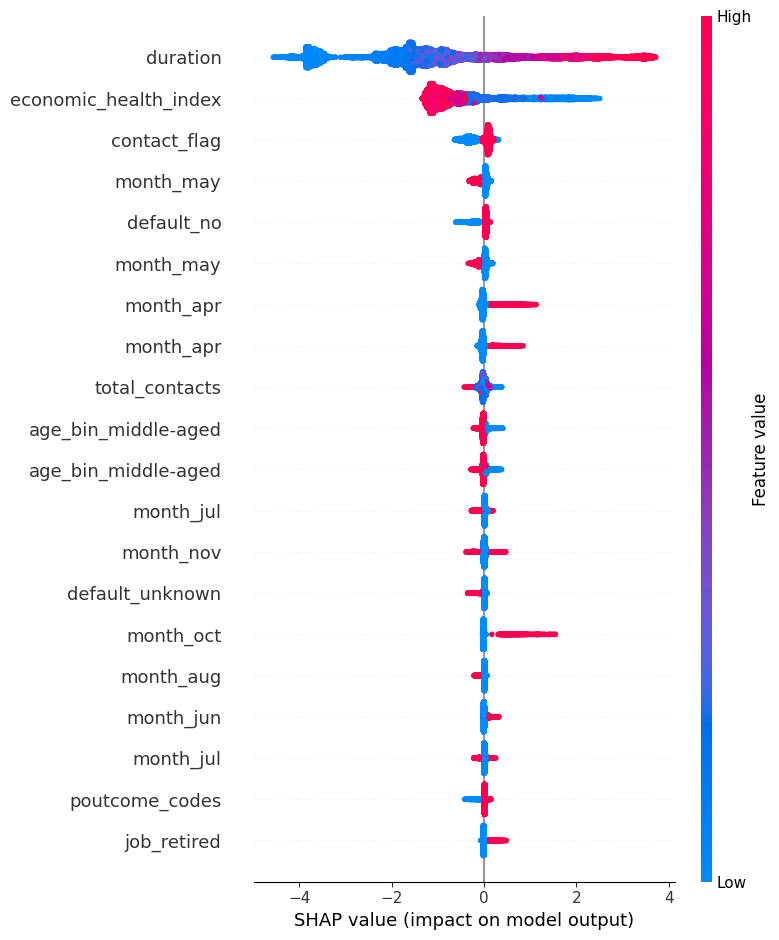

In [110]:
import shap
explainer = shap.TreeExplainer(final_clf)
shap_values = explainer.shap_values(train.to_numpy())
shap.summary_plot(shap_values, train)

The most significant contributions to the model’s prediction come from the features: **duration** and **economic_health_index**.

For **duration**, lower values reduce the probability of a customer signing up for a deposit, while higher values increase the likelihood. On the other hand, for **economic_health_index**, higher values decrease the probability of signing up for a deposit.

Other features show mixed effects and reflect various patterns previously discussed.

More customer contacts in October and April increase the likelihood of success, while more contacts in May decrease it, as well as on Mondays.

The blue dots represent low values, while the red dots represent high values.

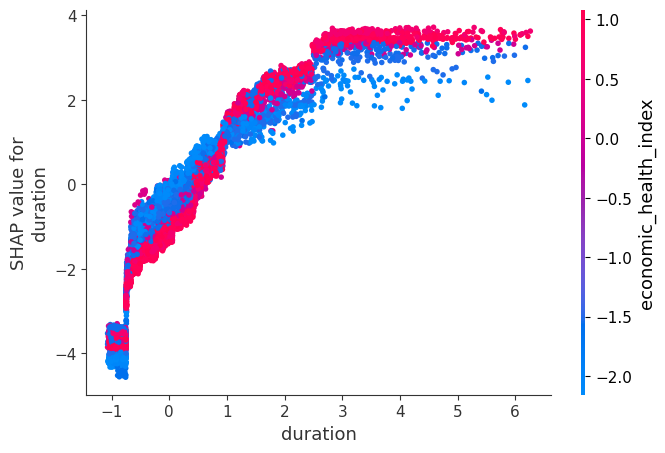

In [111]:
# Visualization of feature dependency
shap.dependence_plot('duration', shap_values, train)

The plot illustrates a nonlinear relationship between duration and economic_health_index. The impact of duration on the prediction is not constant and varies depending on the value of economic_health_index.

At low and negative values of duration, the feature’s contribution to the prediction is negative (below zero). Starting from duration ≈ 1, the impact increases significantly and becomes positive: longer contacts raise the likelihood of deposit sign-up.

After duration ≈ 3, the effect starts to saturate, and the gain in the prediction is almost negligible. This suggests that after a certain contact duration, any further increase in time does not significantly affect the success probability.

In [112]:
from IPython.display import display
import shap

# Initialize JS for SHAP visualizations
shap.initjs()

# Select a record to explain
i = 0

# Visualize SHAP values for this record
display(shap.force_plot(
    explainer.expected_value,  # scalar base value
    shap_values[i],            # SHAP values for the i-th instance
    train.iloc[i]              # Feature values for the i-th instance
))


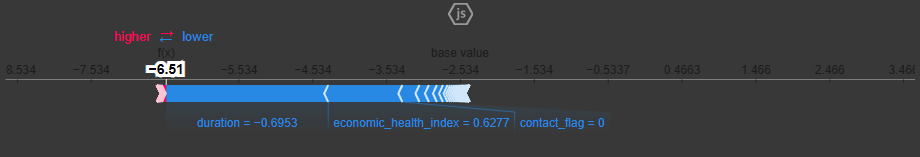

On this graph, you can see how each feature influenced the prediction for one specific client. The average model output is around −2.53, but this client received a prediction of −6.51 — much lower than average, meaning the model expects they will not sign a deposit.

The biggest negative influences were the short call duration, a high economic health index, and being contacted via landline (not mobile). These factors strongly pushed the prediction down.

# 9. Analysis of records

In [113]:
val_pred = final_clf.predict(val.to_numpy())  # Getting predictions
errors = val_targets != val_pred            # Highlighting errors

In [114]:
error_df = val[errors]  # DataFrame with errors
correct_df = val[~errors]  # DataFrame with correct predictions

In [115]:
# Counting the distribution of categorical variables in errors
categorical_cols = ['poutcome_codes']  # Variables to analyze
# Removed 'month_apr' from categorical_cols as it is not suitable for value_counts()
for col in categorical_cols:
    print(f"Distribution of {col} among incorrect predictions:")
    print(error_df[col].value_counts(normalize=True) * 100)
    print("\n")

# Analyzing the mean values of numerical variables in correct and incorrect predictions
numeric_cols = ['duration', 'economic_health_index']
print("Mean values of numerical variables:")
print("Incorrect predictions:\n", error_df[numeric_cols].mean())
print("Correct predictions:\n", correct_df[numeric_cols].mean())

Distribution of poutcome_codes among incorrect predictions:
poutcome_codes
1.00   85.47
0.00   14.22
2.00    0.31
Name: proportion, dtype: float64


Mean values of numerical variables:
Incorrect predictions:
 duration                 1.30
economic_health_index   -0.93
dtype: float64
Correct predictions:
 duration                -0.12
economic_health_index    0.09
dtype: float64


The model most often makes mistakes when poutcome_codes = 1, i.e., failure.

Duration tends to cause more errors with longer calls. You could consider binning the duration (for example, into short, medium, and long).

When the economic_health_index is low, the model makes more mistakes.

This could mean that the model is not properly considering the importance of economic conditions.

In [116]:
# Check class balance in poutcome_codes
class_distribution = df['poutcome_codes'].value_counts(normalize=True) * 100
print("Class balance in poutcome_codes (%):")
print(class_distribution)

Class balance in poutcome_codes (%):
poutcome_codes
1.00   89.47
0.00   10.52
2.00    0.01
Name: proportion, dtype: float64


The dataset is imbalanced, especially the success class (0.01). A model trained on this data is likely to ignore success and predict failure in most cases.

Solution: Data balancing.

Visualizations of the distribution of important features with errors

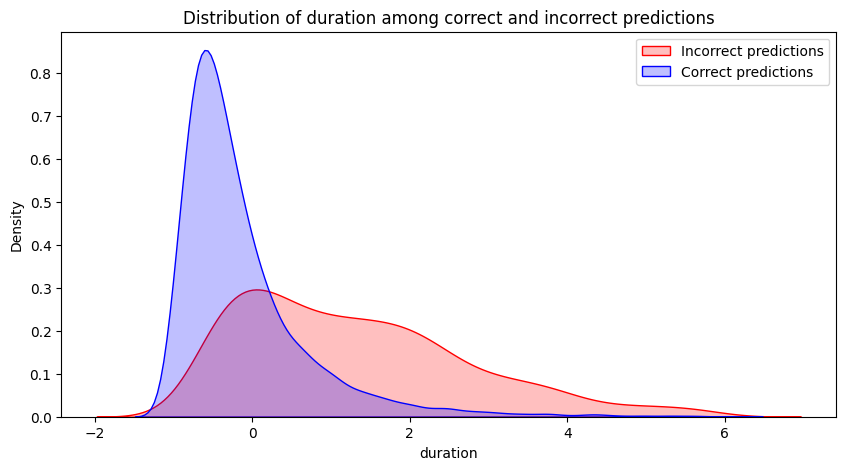

In [117]:
# Visualize the distribution of the "duration" feature among incorrect and correct predictions
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['duration'], label="Incorrect predictions", fill=True, color="red")
sns.kdeplot(correct_df['duration'], label="Correct predictions", fill=True, color="blue")
plt.legend()
plt.title("Distribution of duration among correct and incorrect predictions")
plt.show()

In [118]:
print("Median duration for incorrect predictions:", error_df['duration'].median())
print("Median duration for correct predictions:", correct_df['duration'].median())


Median duration for incorrect predictions: 1.0567347267724612
Median duration for correct predictions: -0.36903210251256163


The model makes more errors with longer calls (where the duration is greater than 1 second).

It performs better with shorter calls, where the duration is less than 1 second (this is evident from the negative median for correct predictions).

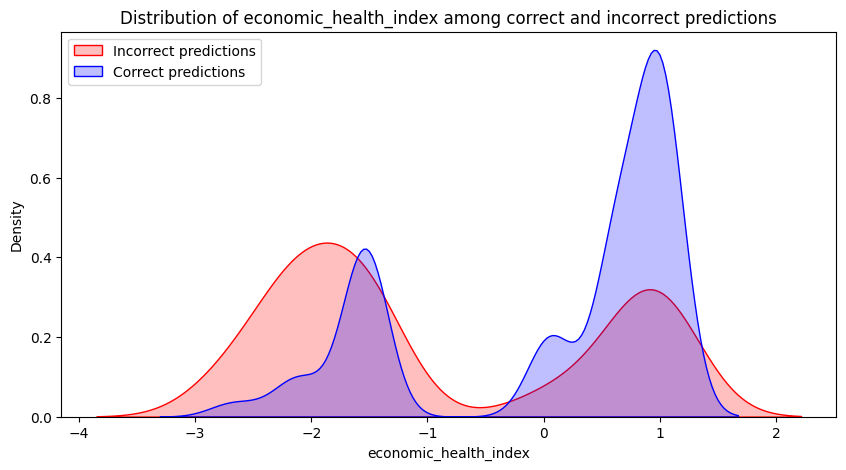

In [119]:
# Visualizing the distribution of the "economic_health_index" feature among incorrect and correct predictions
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['economic_health_index'], label="Incorrect predictions", fill=True, color="red")
sns.kdeplot(correct_df['economic_health_index'], label="Correct predictions", fill=True, color="blue")
plt.legend()
plt.title("Distribution of economic_health_index among correct and incorrect predictions")
plt.show()


In [120]:
print("Median economic_health_index for incorrect predictions:", error_df['economic_health_index'].median())
print("Median economic_health_index for correct predictions:", correct_df['economic_health_index'].median())


Median economic_health_index for incorrect predictions: -1.541750105478863
Median economic_health_index for correct predictions: 0.6276229833563882


The model makes more errors on examples where the economic_health_index is low. This may suggest that the weights for economic features (e.g., emp.var.rate, nr.employed) need to be increased.

In [121]:
probs = final_clf.predict_proba(val.to_numpy())[:, 1]  # Probabilities of class "yes"
error_probs = probs[errors]  # Probabilities for incorrect predictions

print("Average probability of incorrect predictions:", np.mean(error_probs))

Average probability of incorrect predictions: 0.4126327


The model is not very confident in its predictions.

It may be necessary to rebalance the classification threshold, add new features, tune the model’s hyperparameters, and add regularization to address overfitting. A more detailed study of the errors will help understand how to correct them.

# Testing on the Test Set

In [122]:
best_params = {
    'colsample_bytree': 0.4805,
    'gamma': 2.1661,
    'learning_rate': 0.2795,
    'max_depth': 10,
    'min_child_weight': 6,
    'n_estimators': 450,
    'reg_alpha': 1.6910,
    'reg_lambda': 0.3720,
    'subsample': 0.9902
}

xgb_clf = xgb.XGBClassifier(
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
    **best_params
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc:.3f}")
print(f"AUROC on validation data: {val_auroc:.3f}")

AUROC on training data: 0.960
AUROC on validation data: 0.944




---



Evaluation on test

In [124]:
test_pred = xgb_clf.predict_proba(test.to_numpy())[:, 1]
test_auroc = roc_auc_score(test_targets, test_pred)
print(f"AUROC on the test set: {test_auroc}")

AUROC on the test set: 0.9440021529532903


AUROC on the test set: 0.944 – with slight overfitting, but still generalizing very well. It’s suggested to experiment further with feature engineering, hyperparameters, and regularization to improve the model. Excluding the duration column worsened the model’s performance, but it should be removed in the final model.